# **Seminar: Politische Debatten & Polarisierung im Bundestag**
## "Emotionen & Entscheidung - Sentiment & Topic Analyse der Bundestagsdebatten zur Pandemie"

*Autorin: Paula Hofmann*

## 0. Vorbereitende Maßnahmen

### 1.1 Packages installieren

In [1]:
# Import Basic Packages
import numpy as np                 # Numpy
import pandas as pd                 #Datafrane

# Import NLP Packages
import nltk
import spacy

# Import statistic packages
import scipy.stats as stats

# Import visualization features
import pingouin as pg
from tabulate import tabulate

# Import Visualization Packages
from collections import Counter     # um worte zu zählen
import matplotlib.pyplot as plt   # Für Visualisierung
import matplotlib.dates as mdates 
import matplotlib.font_manager as fm
from matplotlib.lines import Line2D  # Import Line2D
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
import plotly.graph_objects as go

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #Wordcloud erstellen


#Settings für Plots
large = 14; med = 12; small = 10
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline


/Users/paulahofmann/anaconda3/envs/env1/lib/python3.11/site-packages/wordcloud/wordcloud.py:35: ResourceWarning: unclosed file <_io.TextIOWrapper name='/Users/paulahofmann/anaconda3/envs/env1/lib/python3.11/site-packages/wordcloud/stopwords' mode='r' encoding='UTF-8'>
  STOPWORDS = set(map(str.strip, open(os.path.join(FILE, 'stopwords')).readlines()))
/var/folders/ss/4y6dgpw950348n7xdxy73vnm0000gn/T/ipykernel_56814/2121218156.py:36: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [2]:
# Methoden aus eigenem Modul aus Github importieren
import Sentiment_Methods

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/paulahofmann/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/paulahofmann/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/paulahofmann/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 4.7 MB/s eta 0:00:0000:0100:01m


/Users/paulahofmann/anaconda3/envs/env1/lib/python3.11/site-packages/catalogue/__init__.py:135: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):


✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')


### 1.2 Datensätze einlesen und vorbereiten
In diesem Abschnitt werden unsere beiden Datensätze mit politischen Reden aus der 19. und 20. Wahlperiode im Kontext von Corona sowie den zuvor ermittelten Sentiment-Scores eingelesen. Zusätzlich werden Daten zur Corona-Pandemie, die vom Robert Koch-Institut auf GitHub frei zur Verfügung gestellt werden, ebenfalls eingelesen.

In [30]:
# Periode 2019 (24.10.2017-26.09.21): Reden im Kontext von Corona + Sentiment
df_sentiment19 = pd.read_csv("/Users/paulahofmann/Library/CloudStorage/OneDrive-Persönlich/Uni/2. Lernpools Master/3. Semester/Soziologie/Data_Analysis/modellorginal19.csv")
df_sentiment19['date'] = pd.to_datetime(df_sentiment19['date'])
df_sentiment19.sort_values(by='date')

Unnamed: 0                                               satz  \
6595        6846  Es gibt einen Grund zur Sorge, aber es gibt si...   
6615        6866  Wir sollten zusammenstehen und auch nicht Pani...   
6616        6867  Daher fordere ich jetzt umgehend eine offene u...   
6617        6868  Wir müssen für die Zukunft in Deutschland auch...   
6618        6869  Das ist eine Perspektive, die wir noch weiter ...   
...          ...                                                ...   
1531        1586  Es ist richtig, dass die Krankheitsverläufe be...   
1532        1587  Aber richtig ist leider auch, dass dieser Verl...   
1533        1588  Für Deutschland ist bislang weitgehend unbekan...   
1525        1580  Ich sage aber auch: Die Inzidenz ist unbestrit...   
1472        1525  Nahezu am Ende dieses Sondersitzungstages geht...   

                id  period       date            name party  redner_id  \
6595  ID1914800900      19 2020-03-04  Andrew Ullmann   FDP   11004922   
6615  ID1914800900      19 2020-03-04  Andrew Ullmann   FDP   11004922   
6616  ID1914800900      19 2020-03-04  Andrew Ullmann   FDP   11004922   
6617  ID1914800900      19 2020-03-04  Andrew Ullmann   FDP   11004922   
6618  ID1914800900      19 2020-03-04  Andrew Ullmann   FDP   11004922   
...            ...     ...        ...             ...   ...        ...   
1531  ID1923805100      19 2021-08-25  Sabine Dittmar   SPD   11004261   
1532  ID1923805100      19 2021-08-25  Sabine Dittmar   SPD   11004261   
1533  ID1923805100      19 2021-08-25  Sabine Dittmar   SPD   11004261   
1525  ID1923805100      19 2021-08-25  Sabine Dittmar   SPD   11004261   
1472  ID1923803900      19 2021-08-25  Tino Chrupalla   AfD   11004695   

                     discussion_title  \
6595         Zusatzpunkt 1 2020-03-04   
6615         Zusatzpunkt 1 2020-03-04   
6616         Zusatzpunkt 1 2020-03-04   
6617         Zusatzpunkt 1 2020-03-04   
6618         Zusatzpunkt 1 2020-03-04   
...                               ...   
1531  Tagesordnungspunkt 3 2021-08-25   
1532  Tagesordnungspunkt 3 2021-08-25   
1533  Tagesordnungspunkt 3 2021-08-25   
1525  Tagesordnungspunkt 3 2021-08-25   
1472  Tagesordnungspunkt 3 2021-08-25   

                                                   text  \
6595  Sehr geehrter Herr Präsident! Liebe Kolleginne...   
6615  Sehr geehrter Herr Präsident! Liebe Kolleginne...   
6616  Sehr geehrter Herr Präsident! Liebe Kolleginne...   
6617  Sehr geehrter Herr Präsident! Liebe Kolleginne...   
6618  Sehr geehrter Herr Präsident! Liebe Kolleginne...   
...                                                 ...   
1531  Sehr geehrte Frau Präsidentin! Liebe Kolleginn...   
1532  Sehr geehrte Frau Präsidentin! Liebe Kolleginn...   
1533  Sehr geehrte Frau Präsidentin! Liebe Kolleginn...   
1525  Sehr geehrte Frau Präsidentin! Liebe Kolleginn...   
1472  Sehr geehrter Herr Präsident! Sehr geehrte Dam...   

                                         tokenized_text  \
6595  ['Sehr geehrter Herr Präsident!', 'Liebe Kolle...   
6615  ['Sehr geehrter Herr Präsident!', 'Liebe Kolle...   
6616  ['Sehr geehrter Herr Präsident!', 'Liebe Kolle...   
6617  ['Sehr geehrter Herr Präsident!', 'Liebe Kolle...   
6618  ['Sehr geehrter Herr Präsident!', 'Liebe Kolle...   
...                                                 ...   
1531  ['Sehr geehrte Frau Präsidentin!', 'Liebe Koll...   
1532  ['Sehr geehrte Frau Präsidentin!', 'Liebe Koll...   
1533  ['Sehr geehrte Frau Präsidentin!', 'Liebe Koll...   
1525  ['Sehr geehrte Frau Präsidentin!', 'Liebe Koll...   
1472  ['Sehr geehrter Herr Präsident!', 'Sehr geehrt...   

                                                 tokens  \
6595  ['gibt', 'Grund', 'Sorge', 'gibt', 'sicherlich...   
6615  ['sollten', 'zusammenstehen', 'nicht', 'Panik'...   
6616  ['Daher', 'fordere', 'umgehend', 'offene', 'st...   
6617  ['müssen', 'Zukunft', 'Deutschland', 'stärkere...   
6618            ['Perspektive', 'entwickeln', 'müssen']   

In [29]:
# Legislaturperiode 2020 (24.10.2017-26.09.21): Reden im Kontext von Corona + Sentiment 
df_sentiment20 = pd.read_csv("/Users/paulahofmann/Library/CloudStorage/OneDrive-Persönlich/Uni/2. Lernpools Master/3. Semester/Soziologie/Data_Analysis/modellorginal20.csv")
df_sentiment20['date'] = pd.to_datetime(df_sentiment20['date'])
df_sentiment20.sort_values(by='date')

Unnamed: 0                                               satz  \
705         744  Sie, sehr geehrte Kolleginnen und Kollegen von...   
726         765  Um vor die vierte Welle zu kommen, müssen wir ...   
727         766                              Und das schaffen wir.   
728         767  Das haben wir im Sommer schon geschafft, und w...   
729         768               Niedergelassene Ärzte werden impfen.   
..          ...                                                ...   
893         942  Sie sind verantwortlich für diesen beispiellos...   
892         941  Nach einer jahrzehntelangen Vernachlässigung d...   
891         940  Im zweiten Jahr hintereinander\n              ...   
911         960  Die Regierung aus Union und SPD hat unter dem ...   
914         963  Der DOSB und die AfD haben früh gesagt: Der Sp...   

              id  period       date            name party  redner_id  \
705   ID20300100      18 2021-11-18  Sabine Dittmar   SPD   11004261   
726   ID20300100      18 2021-11-18  Sabine Dittmar   SPD   11004261   
727   ID20300100      18 2021-11-18  Sabine Dittmar   SPD   11004261   
728   ID20300100      18 2021-11-18  Sabine Dittmar   SPD   11004261   
729   ID20300100      18 2021-11-18  Sabine Dittmar   SPD   11004261   
..           ...     ...        ...             ...   ...        ...   
893  ID209400400      18 2023-03-30      Jörn König   AfD   11004788   
892  ID209400400      18 2023-03-30      Jörn König   AfD   11004788   
891  ID209400400      18 2023-03-30      Jörn König   AfD   11004788   
911  ID209400400      18 2023-03-30      Jörn König   AfD   11004788   
914  ID209400400      18 2023-03-30      Jörn König   AfD   11004788   

                    discussion_title  \
705  Tagesordnungspunkt 1 2021-11-18   
726  Tagesordnungspunkt 1 2021-11-18   
727  Tagesordnungspunkt 1 2021-11-18   
728  Tagesordnungspunkt 1 2021-11-18   
729  Tagesordnungspunkt 1 2021-11-18   
..                               ...   
893  Tagesordnungspunkt 6 2023-03-30   
892  Tagesordnungspunkt 6 2023-03-30   
891  Tagesordnungspunkt 6 2023-03-30   
911  Tagesordnungspunkt 6 2023-03-30   
914  Tagesordnungspunkt 6 2023-03-30   

                                                  text  \
705  Sehr geehrte Frau Präsidentin! Sehr geehrte Da...   
726  Sehr geehrte Frau Präsidentin! Sehr geehrte Da...   
727  Sehr geehrte Frau Präsidentin! Sehr geehrte Da...   
728  Sehr geehrte Frau Präsidentin! Sehr geehrte Da...   
729  Sehr geehrte Frau Präsidentin! Sehr geehrte Da...   
..                                                 ...   
893  Sehr geehrte Frau Präsidentin! Sehr geehrte Fr...   
892  Sehr geehrte Frau Präsidentin! Sehr geehrte Fr...   
891  Sehr geehrte Frau Präsidentin! Sehr geehrte Fr...   
911  Sehr geehrte Frau Präsidentin! Sehr geehrte Fr...   
914  Sehr geehrte Frau Präsidentin! Sehr geehrte Fr...   

                                        tokenized_text  \
705  ['Sehr geehrte Frau Präsidentin!', 'Sehr geehr...   
726  ['Sehr geehrte Frau Präsidentin!', 'Sehr geehr...   
727  ['Sehr geehrte Frau Präsidentin!', 'Sehr geehr...   
728  ['Sehr geehrte Frau Präsidentin!', 'Sehr geehr...   
729  ['Sehr geehrte Frau Präsidentin!', 'Sehr geehr...   
..                                                 ...   
893  ['Sehr geehrte Frau Präsidentin!', 'Sehr geehr...   
892  ['Sehr geehrte Frau Präsidentin!', 'Sehr geehr...   
891  ['Sehr geehrte Frau Präsidentin!', 'Sehr geehr...   
911  ['Sehr geehrte Frau Präsidentin!', 'Sehr geehr...   
914  ['Sehr geehrte Frau Präsidentin!', 'Sehr geehr...   

                                                tokens  \
705  ['Union', 'allerdings', 'verfassungsrechtlich'...   
726  ['vierte', 'Welle', 'kommen', 'müssen', 'tägli...   
727                                       ['schaffen']   
728  ['Sommer', 'schon', 'geschafft', 'brauchen', '...   
729             ['Niedergelassene', 'Ärzte', 'impfen']   
..                                                 ...   
893  ['verantwortl

In [99]:
# Durch Betrachtung des df wurde festgestellt, dass bei einigen Politikern die Partei nicht angegeben ist, dieses wird nun manuell ergänzt.

# Definieren eines dictionary, um Politikernamen den aktuell "unbekannten" Parteien zuzuordnen.

party_mapping = {
    'Olaf Scholz': 'SPD',
    'Horst Seehofer': 'CDU/CSU',
    'Annegret Kramp-Karrenbauer': 'CDU/CSU',
    'Dr. Volker Wissing': 'FDP',
    'Michael Kretschmer': 'CDU/CSU',
    'Dr. Janosch Dahmen': 'BÜNDNIS 90/DIE GRÜNEN',
    'Svenja Schulze': 'SPD'
}

# Update der df um fehlende Informationen
df_sentiment20['party'] = df_sentiment20['name'].map(party_mapping).fillna(df_sentiment20['party'])
df_sentiment19['party'] = df_sentiment19['name'].map(party_mapping).fillna(df_sentiment19['party'])

# Zur einfacheren Visualisierung in den Plots wird "Die Grünen" umbenannt
df_sentiment20['party'] = df_sentiment20['party'].replace("BÜNDNIS 90/DIE GRÜNEN", "DIE GRÜNEN")
df_sentiment19['party'] = df_sentiment19['party'].replace("BÜNDNIS 90/DIE GRÜNEN", "DIE GRÜNEN")


In [103]:
# Erstellen eines merged Dataframes, um einfacher bewerten zu können wie sich das Sentiment im Zeitverlauf zu den Corona Fallzahlen entwickelt 
# Corona Pandemie erstreckt sich über zwei Wahlperiode, zur einfacheren Vergleichbarkeit werden df 19. und df 20. zusammengeführt

merged_sentiment = pd.concat([df_sentiment19, df_sentiment20], ignore_index=True)


In [104]:
# Scores für das Sentiment festlegen, hier umgekehrte Wertung -> "100" sehr negativ für einfachere graphische Visualisierung auf der y-Achse. 

sentiment_score_map = {
    'positive': 0.0,
    'neutral': 50.0,
    'negative': 100.0
}

# Add a new variable 'Sentiment_Score' to the 'merged_Sentiment' dataframe
merged_sentiment['Sentiment_Score'] = merged_sentiment['Sentiment_Label'].map(sentiment_score_map)


Im nächsten Schritt brauchen wir noch die Corona Fallzahle, dazu lesen wir die frei verfügbaren Corona Zahlen des RKI ein. 
Wir betrachten hier vor allem die 7-Tages-Inzidenz als robuste Angabe zum Corona Verlauf. 

In [4]:
#Einlesen der Corona Fallzahlen für den Zeitraum 25.02.2020-21.04.2023
url="https://raw.githubusercontent.com/robert-koch-institut/COVID-19_7-Tage-Inzidenz_in_Deutschland/main/COVID-19-Faelle_7-Tage-Inzidenz_Deutschland.csv"
corona_fallzahlen = pd.read_csv(url,parse_dates=[0])

#Ändern "meldedatum" zu "date"
corona_fallzahlen.rename(columns={'Meldedatum': 'date'}, inplace=True)
corona_fallzahlen['date'] = pd.to_datetime(corona_fallzahlen['date'])
corona_fallzahlen.sort_values(by='date')

date Altersgruppe  Bevoelkerung  Faelle_gesamt  Faelle_neu  \
0    2020-01-03        00-04       3975333              0           0   
1    2020-01-03          00+      83237124              1           1   
2    2020-01-03        05-14       7631602              0           0   
3    2020-01-03        15-34      18795840              0           0   
4    2020-01-03        35-59      28403806              0           0   
...         ...          ...           ...            ...         ...   
9507 2023-09-22          00+      83237124       38484922         903   
9508 2023-09-22        05-14       7631602        4497360          21   
9509 2023-09-22        15-34      18795840       11185823         128   
9510 2023-09-22        35-59      28403806       14974408         302   
9512 2023-09-22          80+       6111655        1645270         185   

      Faelle_7-Tage  Inzidenz_7-Tage  
0                 0              0.0  
1                 0              0.0  
2                 0              0.0  
3                 0              0.0  
4                 0              0.0  
...             ...              ...  
9507           7387              8.9  
9508            112              1.5  
9509           1049              5.6  
9510           2133              7.5  
9512           1717             28.1  

[9513 rows x 7 columns]

In [5]:
# Filtern damit nur Fälle auf Landesebene unabhängig von der Altersgruppe vorhanden sind
# (=> Merkamle ID_ Altersgruppe = 00+)

corona_fallzahlen_gesamt = corona_fallzahlen[corona_fallzahlen["Altersgruppe"]== "00+"]
corona_fallzahlen_gesamt

date Altersgruppe  Bevoelkerung  Faelle_gesamt  Faelle_neu  \
1    2020-01-03          00+      83237124              1           1   
8    2020-01-04          00+      83237124              1           0   
15   2020-01-05          00+      83237124              1           0   
22   2020-01-06          00+      83237124              1           0   
29   2020-01-07          00+      83237124              1           0   
...         ...          ...           ...            ...         ...   
9479 2023-09-18          00+      83237124       38478898          76   
9486 2023-09-19          00+      83237124       38480973        2075   
9493 2023-09-20          00+      83237124       38482575        1602   
9500 2023-09-21          00+      83237124       38484019        1444   
9507 2023-09-22          00+      83237124       38484922         903   

      Faelle_7-Tage  Inzidenz_7-Tage  
1                 0              0.0  
8                 0              0.0  
15                0              0.0  
22                0              0.0  
29                0              0.0  
...             ...              ...  
9479           8126              9.8  
9486           8114              9.7  
9493           7992              9.6  
9500           7845              9.4  
9507           7387              8.9  

[1359 rows x 7 columns]

## 1. Fragestellung
Die Sentimentanalyse politischer Reden während der COVID-19-Pandemie konzentriert sich auf zwei Hauptfragen: Erstens, ob eine Verbindung zwischen den Corona-Fallzahlen und der Sentimententwicklung in politischen Reden besteht, und zweitens, welche Schlüsselthemen während Pandemiehochphasen und Sentimenthöhepunkten relevant waren?

Die Sentimentanalyse wurde im Rahmen von Corona vor allem im Kontext von Twitter Daten durchgeführt: 
- Alamoodi, Abdullah Hussein, et al. "Sentiment analysis and its applications in fighting COVID-19 and infectious diseases: A systematic review." Expert systems with applications 167 (2021): 114155.
- Nemes, László, and Attila Kiss. "Social media sentiment analysis based on COVID-19." Journal of Information and Telecommunication 5.1 (2021): 1-15.

Um diese Fragen zu klären, wurde zunächst eine Korrelationsanalyse zwischen politischen Reden und epidemiologischen Daten durchgeführt, um mögliche Zusammenhänge zu ermitteln.
Auch andere Forschung hat sich im Kontext der Analyse von Twitter Daten mit der Korrelation zwischen den Corona Fallzahlen und dem Sentiment Verlauf beschäftigt, siehe dazu auch: 
- Dubey, A. D. (2020). Twitter sentiment analysis during COVID-19 outbreak. Available at SSRN 3572023. 

Anschließend erfolgte die Analyse der Hochphasen der Pandemie und Sentimenthöhepunkte, um wichtige politische Themen und deren Einfluss auf die Sentiments herauszuarbeiten. Auch hier haben verschiedene Forschungen Topic Modelle verwendet, um relevante Themen der Corona Pandemie zu identifizieren: 
- PRABHAKAR KAILA, Dr Rajesh; PRASAD, Dr AV. Informational flow on Twitter–Corona virus outbreak–topic modelling approach. International Journal of Advanced Research in Engineering and Technology (IJARET), 2020, 11. Jg., Nr. 3.

Diese Untersuchung ermöglicht nicht nur das Verständnis politischer Einflüsse auf die öffentliche Meinung und Reaktionen auf die Pandemie, sondern auch die Identifikation der Themen, die die politische Agenda in Krisenzeiten beeinflusst haben.

## 2. Deskriptive Analyse

### 2.1 Analyse der Coronafallzahlen

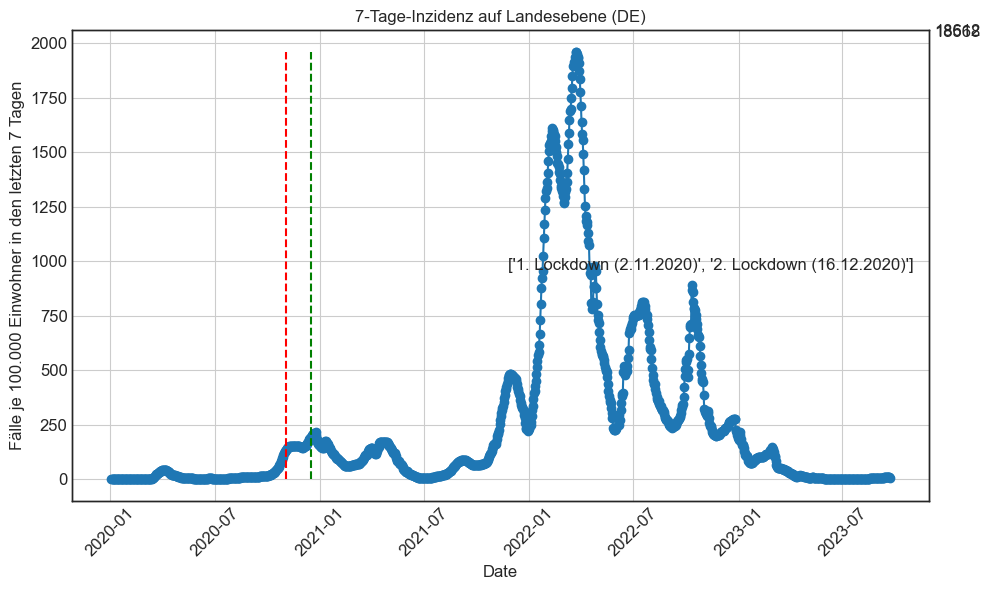

In [105]:
# Plott erstellen
plt.figure(figsize=(10, 6))

# Plotten 7-Tages-Inzidenz auf y-achse
plt.plot(corona_fallzahlen_gesamt['date'], corona_fallzahlen_gesamt['Inzidenz_7-Tage'], marker='o', linestyle='-')
plt.title('7-Tage-Inzidenz auf Landesebene (DE)')
plt.xlabel('Date')
plt.ylabel('Fälle je 100.000 Einwohner in den letzten 7 Tagen')
plt.grid(True)
plt.xticks(rotation=45)

# Umwandlung Datenformat
lockdown_dates = [mdates.date2num(pd.to_datetime('2020-11-02')),
                  mdates.date2num(pd.to_datetime('2020-12-16'))]

# Hinzufügen von Linien zur Visualisierung der Lockdown Daten 
plt.vlines(lockdown_dates, ymin=0, ymax=max(corona_fallzahlen_gesamt['Inzidenz_7-Tage']),
           color=['red', 'green'], linestyle='--')

# Label Beschriftung
ax2 = plt.gca().twinx()


ax2.set_yticks(lockdown_dates)

# Adding invisible scatter points for legend creation
scatter_for_legend = ax2.scatter([], [], alpha=0, label= [
    "1. Lockdown (2.11.2020)",
    "2. Lockdown (16.12.2020)"],)

# Show the legend
plt.legend(handles=[scatter_for_legend], loc='center right')

# Show the plot
plt.tight_layout()
plt.show()



### 2.2 Sentiment Analyse

Hier werden nun einige Methoden entwickelt die bei der Analyse des Sentiments helfen. 

In [74]:
# Definieren einer Funktion zur Ausgabe der n-Gramme, damit können wichtige Zusammenhänge zwischen Wörtern im Kontext von Corona erkannt werden.

from collections import Counter
import re

def plot_most_frequent_ngrams(df, num_most_common=10):
    # Get the tokens from the DataFrame
    tokens = list(df['cleaned_text'].values)

    # Define your custom stopwords list
    custom_stopwords = ['Bündnis 90 Grünen', 'CDU', 'CSU-Fraktion','nicht','Bündnis','CSU',' ','-','zwei','Jahre','Jahren',"90","Grünen","Bündnis"]

    # Create a pattern that matches any of the custom stopwords
    stopwords_pattern = re.compile(r'\b(?:' + '|'.join(re.escape(word) for word in custom_stopwords) + r')\b')

    # Count unigrams
    unigram_counts = Counter()
    for text in tokens:
        unigrams = [word for word in re.split(r'\s+', text) if not stopwords_pattern.search(word)]
        unigram_counts.update(unigrams)

    # Count bigrams
    bigram_counts = Counter()
    for text in tokens:
        unigrams = [word for word in re.split(r'\s+', text) if not stopwords_pattern.search(word)]
        bigrams = [",".join(bigram) for bigram in zip(unigrams[:-1], unigrams[1:])]
        bigram_counts.update(bigrams)

    # Count trigrams
    trigram_counts = Counter()
    for text in tokens:
        unigrams = [word for word in re.split(r'\s+', text) if not stopwords_pattern.search(word)]
        trigrams = [",".join(trigram) for trigram in zip(unigrams[:-2], unigrams[1:-1], unigrams[2:])]
        trigram_counts.update(trigrams)

    # Get the most frequent tokens
    most_common_unigrams = unigram_counts.most_common(num_most_common)
    most_common_bigrams = bigram_counts.most_common(num_most_common)
    most_common_trigrams = trigram_counts.most_common(num_most_common)
    # Create a figure with three subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Plot most frequent unigrams as horizontal bar chart
    axes[0].barh([str(gram) for gram, count in most_common_unigrams], [count for gram, count in most_common_unigrams])
    axes[0].set_title('Most Frequent Unigrams')
    axes[0].set_xlabel('Frequency')

    # Plot most frequent bigrams as horizontal bar chart
    axes[1].barh([str(gram) for gram, count in most_common_bigrams], [count for gram, count in most_common_bigrams])
    axes[1].set_title('Most Frequent Bigrams')
    axes[1].set_xlabel('Frequency')

    # Plot most frequent trigrams as horizontal bar chart
    axes[2].barh([str(gram) for gram, count in most_common_trigrams], [count for gram, count in most_common_trigrams])
    axes[2].set_title('Most Frequent Trigrams')
    axes[2].set_xlabel('Frequency')
    


    plt.tight_layout()
    plt.show()
    

In [128]:
# Methode zur Ausgabe der Häufigkeitsverteilung des Sentiments nach Parteizugehörigkeit

def plot_sentiment_by_party(df, width=800):
    
    # Filter out the "party fraktionslos" from the DataFrame
    df_filtered = df[df['party'] != 'Fraktionslos']

    # Group the data by party and sentiment label and count the occurrences
    party_sentiment = df_filtered.groupby(['party', 'Sentiment_Label']).size().reset_index(name='Count')

    # Calculate the total count for each party
    party_count = party_sentiment.groupby('party')['Count'].sum()

    # Calculate the percentage of each sentiment category for each party
    party_sentiment['Percentage'] = party_sentiment.apply(lambda row: row['Count'] / party_count[row['party']] * 100, axis=1)

    # Create separate dataframes for each sentiment label
    positive_df = party_sentiment[party_sentiment['Sentiment_Label'] == 'positive']
    negative_df = party_sentiment[party_sentiment['Sentiment_Label'] == 'negative']

    # Create the plot
    fig = go.Figure()
    fig.add_trace(go.Bar(x=positive_df['party'], y=positive_df['Percentage'], name='Positive', marker_color='turquoise',
                         text=positive_df['Percentage'].apply(lambda x: f'{x:.2f}%'),
                         textposition='auto'))
    fig.add_trace(go.Bar(x=negative_df['party'], y=negative_df['Percentage'], name='Negative', marker_color='purple',
                         text=negative_df['Percentage'].apply(lambda x: f'{x:.2f}%'),
                         textposition='auto'))

    fig.update_layout(
        barmode='group',
        width=width,  # Adjust the width as needed 
        title_text=f'Sentimentverteilung der Parteien des DataFrame"{df}"'  # Use f-string to include DataFrame name

    )

    # Set the title font size and margin
    fig.update_layout(
        title=dict(
            font=dict(size=16),  # Adjust the font size as needed
            y=0.95  # Adjust the vertical position of the title
        )
    )

    # Show the plot
    fig.show()


#### 2.2.1 Nach Wahlperiode (Sentimentanalyse)

Zuerst wollen wir eine kurze deskriptive Analyse des Sentiments nach der jeweiligen Wahlperiode vornehmen. Dazu betrachten wir unsere zuvor eingelesenen Datensätze Wahlperiode 19. und Wahlperiode 20.

In [129]:
# Plotten der Sentimentverteilung nach Parteizugehörigkeit durch Methodenaufrufe plot Sentiment by party
plot_sentiment_by_party(df_sentiment19)

plot_sentiment_by_party(df_sentiment20)

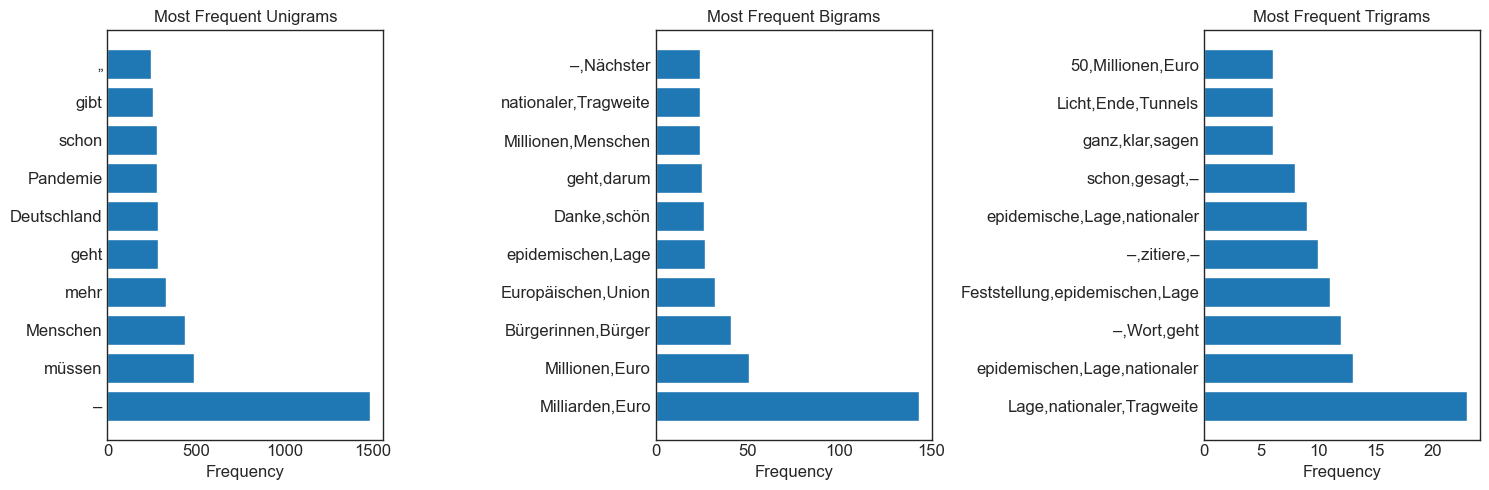

In [75]:
#Ausgabe der nGrams, um Stopwortliste zu überarbeiten
ngram_Stoppwortliste19 = plot_most_frequent_ngrams (df_sentiment19)

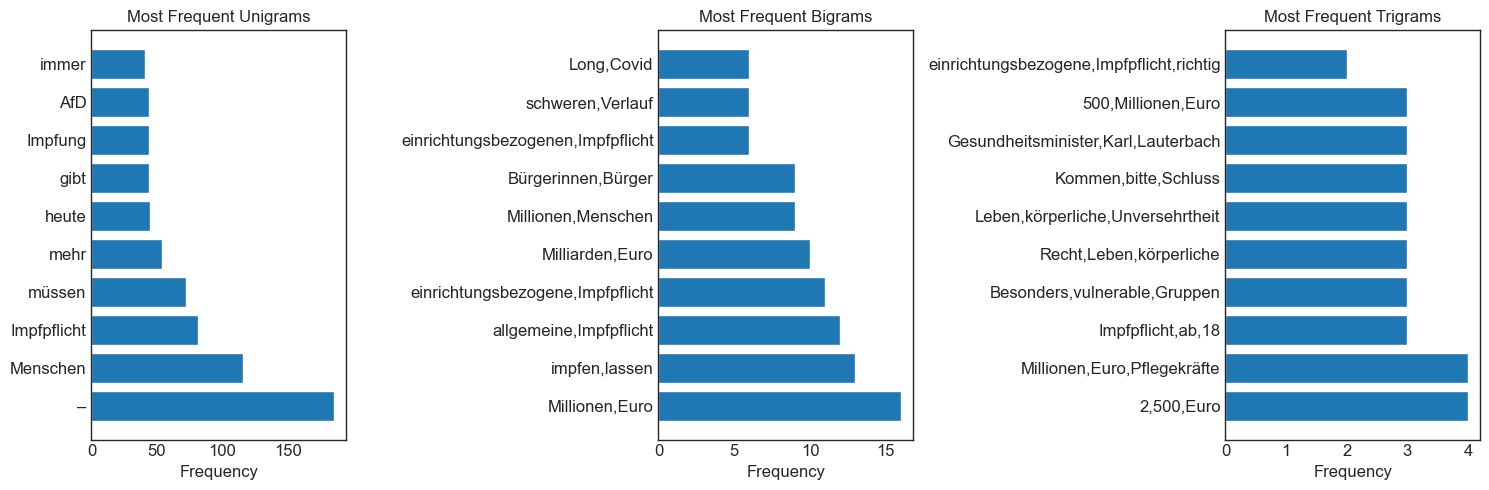

In [76]:
# Ausgabe der n-gramme der 20 Wahlperiode
ngram_Stoppwortliste20 = plot_most_frequent_ngrams (df_sentiment20)

#ngram_Stoppwortliste20 = Sentiment_Methods.plot_most_frequent_ngrams (df_sentiment20)

/Users/paulahofmann/anaconda3/envs/env1/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



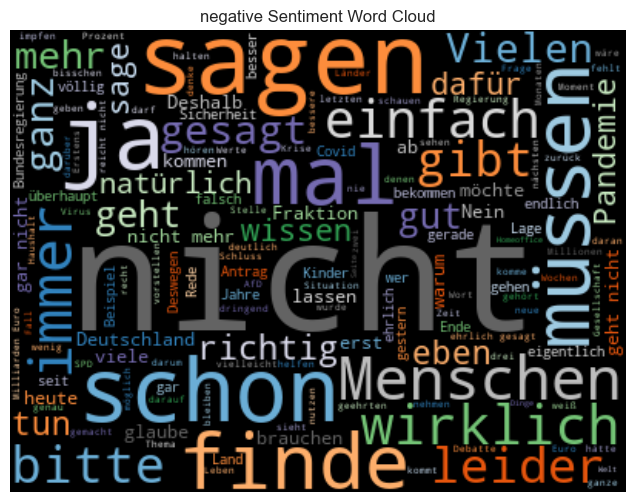

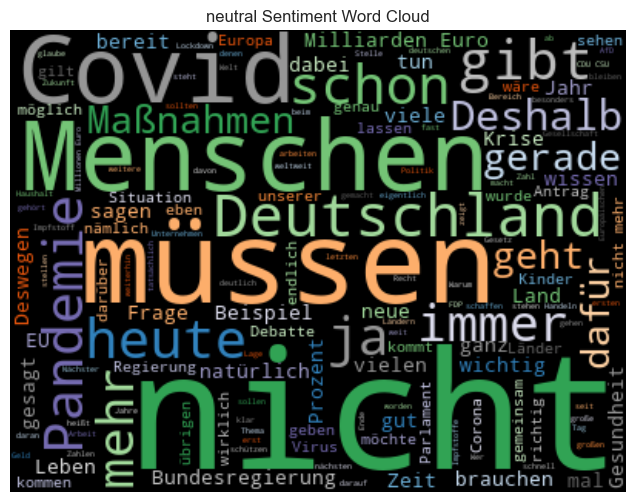

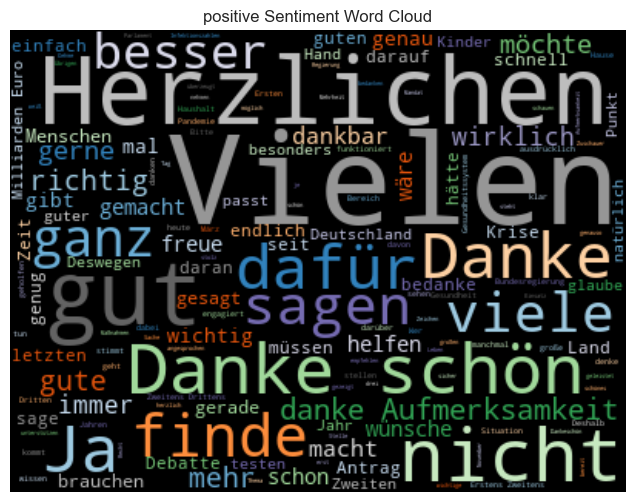

/Users/paulahofmann/anaconda3/envs/env1/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



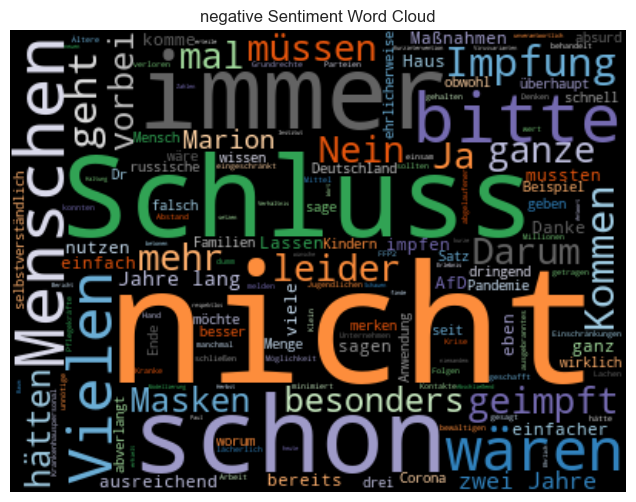

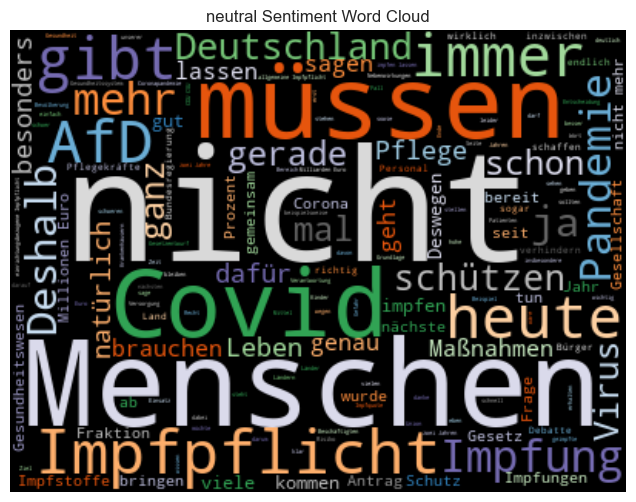

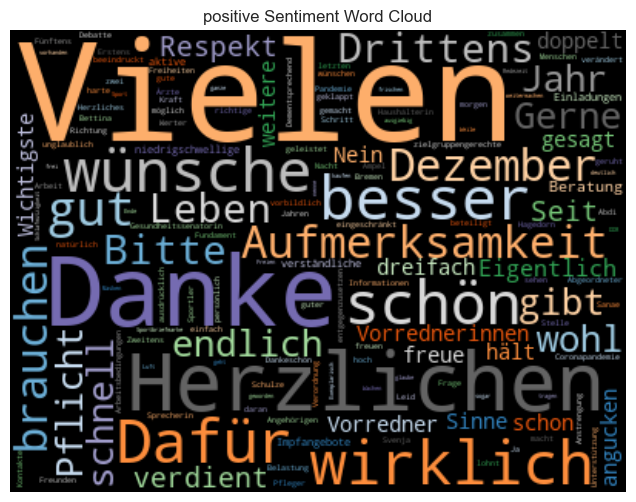

In [130]:
# Im nächsten Schritt betrachten wir Wordclouds in Abhängigkeit des negativen, positiven und neutralen Sentiments. 

Sentiment_Methods.plot_sentiment_wordclouds (df_sentiment19)
Sentiment_Methods.plot_sentiment_wordclouds (df_sentiment20)

#### 2.1.2 Sentiment Analyse Gesamt

Nun wollen wir das Gesamtsentiment über beide Wahlperiode genauer untersuchen, die nachfolgenden Analysen beziehen sich also auf die Sentiment Angaben aus der 19. und 20. Wahlperiode. 

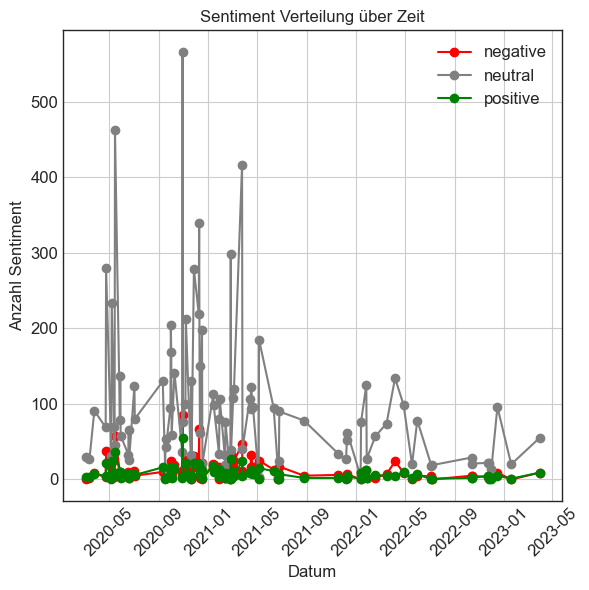

In [131]:
# Gruppieren des df nach datum und sentiment label, Häufigkeit der Sentimentkategorien zählen
sentiment_counts = merged_sentiment.groupby(['date', 'Sentiment_Label']).size().unstack(fill_value=0)

# Plot visualisieren
plt.figure(figsize=(6, 6))

# Linienfarbe festelegen, für jedes Sentiment
line_colors = {
    'positive': 'green',
    'neutral': 'grey',
    'negative': 'red'
}

# Plotten je Sentiment 
for sentiment in sentiment_counts.columns:
    plt.plot(sentiment_counts.index, sentiment_counts[sentiment], marker='o', linestyle='-', label=sentiment, color=line_colors[sentiment])

# Grafik anpassen
plt.title('Sentiment Verteilung über Zeit')
plt.xlabel('Datum')
plt.ylabel('Anzahl Sentiment')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()

# Plot anzeigen
plt.tight_layout()
plt.show()

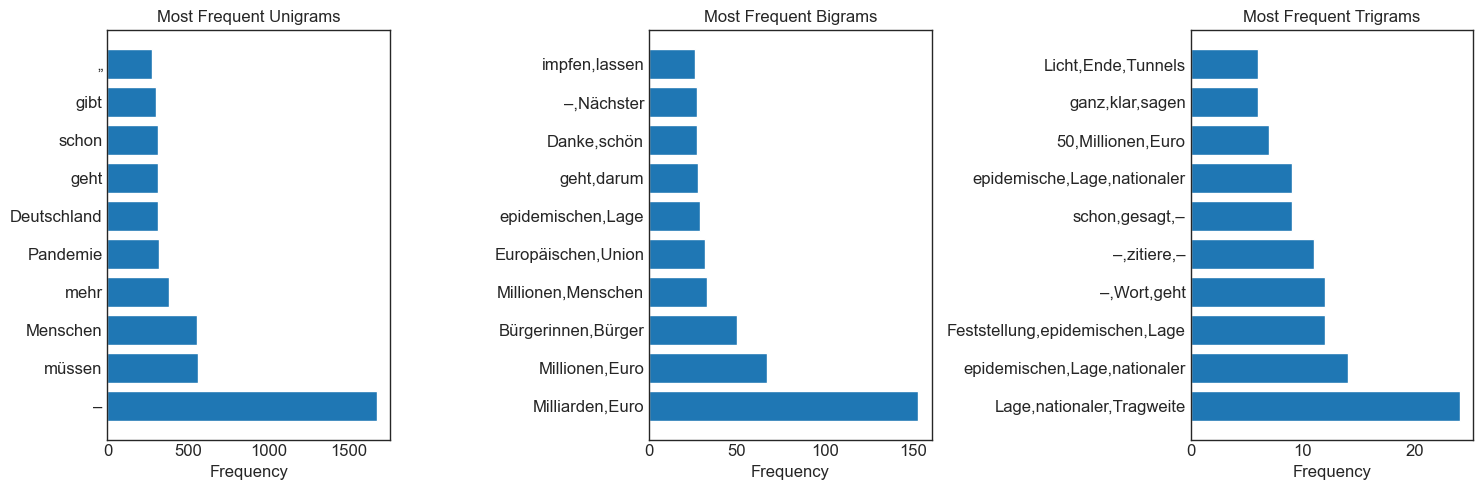

In [132]:
# Betrachtet man die n-Gramm über beide Wahlperioden zeigt sich eine andere Verteilung der Wort-Häufigkeit
ngram_Stoppwortliste20 = plot_most_frequent_ngrams (merged_sentiment)

In [135]:
import plotly.graph_objects as go

def plot_sentiment_by_party(df):
    # Filter out the "party fraktionslos" from the DataFrame
    df_filtered = df[df['party'] != 'Fraktionslos']

    # Group the data by party and sentiment label and count the occurrences
    party_sentiment = df_filtered.groupby(['party', 'Sentiment_Label']).size().reset_index(name='Count')

    # Calculate the total count for each party
    party_count = party_sentiment.groupby('party')['Count'].sum()

    # Calculate the percentage of each sentiment category for each party
    party_sentiment['Percentage'] = party_sentiment.apply(lambda row: row['Count'] / party_count[row['party']] * 100, axis=1)

    # Create separate dataframes for each sentiment label
    positive_df = party_sentiment[party_sentiment['Sentiment_Label'] == 'positive']
    negative_df = party_sentiment[party_sentiment['Sentiment_Label'] == 'negative']
    neutral_df = party_sentiment[party_sentiment['Sentiment_Label'] == 'neutral']

    # Create the plot
    fig = go.Figure()
    fig.add_trace(go.Bar(x=positive_df['party'], y=positive_df['Count'], name='Positive', marker_color='mediumseagreen',
                         text=positive_df['Percentage'].apply(lambda x: f'{x:.2f}%'),
                         textposition='auto'))
    fig.add_trace(go.Bar(x=negative_df['party'], y=negative_df['Count'], name='Negative', marker_color='crimson',
                         text=negative_df['Percentage'].apply(lambda x: f'{x:.2f}%'),
                         textposition='auto'))
    fig.add_trace(go.Bar(x=neutral_df['party'], y=neutral_df['Count'], name='Neutral', marker_color='royalblue',
                         text=neutral_df['Percentage'].apply(lambda x: f'{x:.2f}%'),
                         textposition='auto'))
    
    # Show the plot
    fig.show()

# Example usage:
# plot_sentiment_by_party(your_dataframe)


In [73]:
# Ausgabe der Sentimentverteilung über den gesamten df
plot_sentiment_by_party(merged_sentiment)

/Users/paulahofmann/anaconda3/envs/env1/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



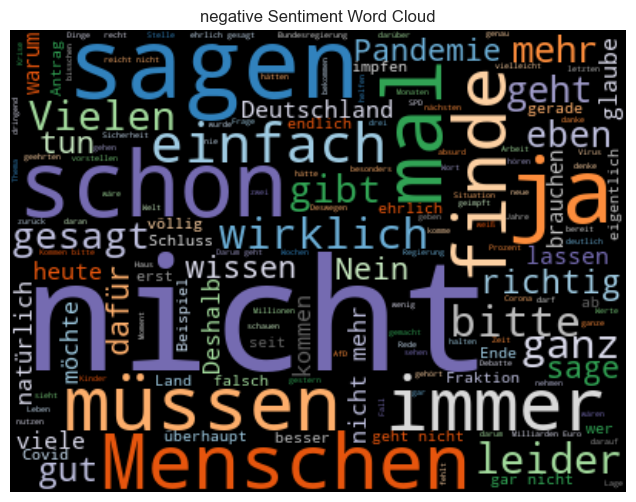

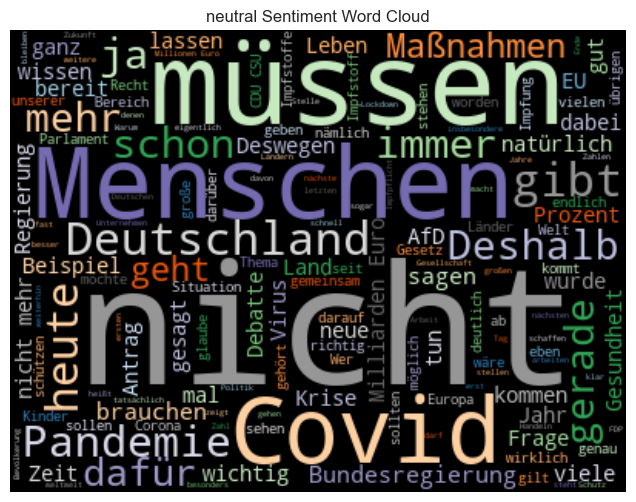

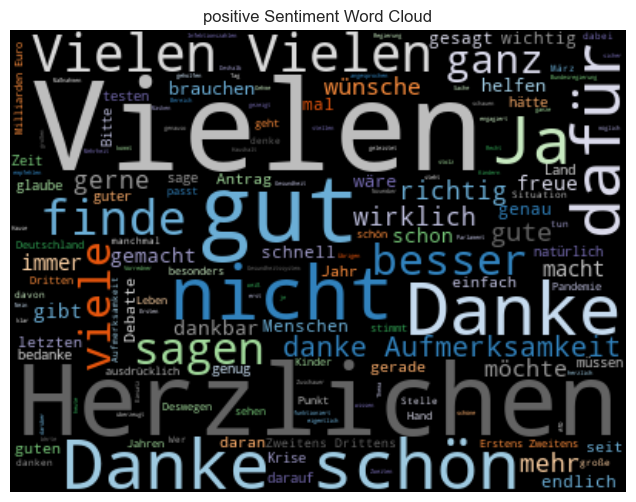

In [136]:
Sentiment_Methods.plot_sentiment_wordclouds (merged_sentiment)

## 3. Weiterführende Analysen

### 3.1 Bestimmung des durchschnittlichen Tagessentiments 

Um fortgeschrittene Analysen wie eine Korrelationsanalyse durchführen zu können, benötigen wir statt der Sentiment-Labels "positiv", "negativ" oder "neutral", die wir durch das germanSentiment Modell erhalten haben, einen Score, der das tägliche Sentiment widerspiegelt. Daher entwickeln wir eine Methode, die basierend auf der eindeutigen ID, die einer Rede an einem bestimmten Tag von einem Politiker/Politikerin zugeordnet ist, diesen Score berechnet. Das bedeutet für unseren Datensatz, dass wir aus den auf Satzebene erhaltenen Sentiment-Werten einen Durchschnittswert über alle Sätze eines Politikers an einem bestimmten Tag bilden.

In [137]:
# Methode zur Berechnung des durchschnittlichen Sentiments pro Tag/Politiker

def calculate_average_sentiment_score(df):
    """
    Berechnung des durchschnittlichen Sentiments für jede eindeutige 'id' (=Rede eines Politikers) in einem DataFrame.

    Parameter:
        df (pd.DataFrame): Das DataFrame enthält 'date', 'party', 'name', 'id', 'text', 'period', 'sentiment_label'.

    Returns:
        pd.DataFrame: Ein neues DataFrame mit dem durchschnittlichen Stimmungswert für jede 'id'.

    """
    # Sentiment-Label werden in Integer Werte umgerechnet. 
    sentiment_score_map = {
        'positive': 0.0,
        'neutral': 50.0,
        'negative': 100.0       #zur einfacheren Grafischen Visualisierung ist 100 das "schlechteste"
    }

    # Ordne Sentiment-Labels Sentiment-Werten zu.
    df['Sentiment_Score'] = df['Sentiment_Label'].map(sentiment_score_map)

    # Gruppiere das DataFrame nach 'id' und berechne den durchschnittlichen Sentiment-Wert für jede 'id'.
    result_df = merged_sentiment.groupby('id').agg({
        'date': 'first',        # Ursprüngliches 'date' behalten
        'party': 'first',       # Ursprüngliches 'party'behalten
        'name': 'first',        # Ursprüngliches 'name' behalten
        'text': 'first',        # Ursprüngliches 'text' behalten
        'period': 'first',      # Ursprüngliches 'period' behalten
        'Sentiment_Score': 'mean'  # Berechnung des durchschnittlichen Sentiments
    }).reset_index()

    return result_df

# Anwendung auf unseren Merged df, der alle Sentimentwerte aus der 19. & 20. Wahlperiode enthält
result_df = calculate_average_sentiment_score(merged_sentiment)
print(result_df)




               id       date       party                 name  \
0    ID1914800900 2020-03-04         FDP       Andrew Ullmann   
1    ID1915300100 2020-03-13         SPD          Olaf Scholz   
2    ID1915400200 2020-03-25         AfD    Alexander Gauland   
3    ID1915401300 2020-03-25     CDU/CSU        Thorsten Frei   
4    ID1915402500 2020-03-25         SPD  Christine Lambrecht   
..            ...        ...         ...                  ...   
238   ID207703900 2022-12-16  DIE GRÜNEN           Armin Grau   
239   ID207704300 2022-12-16         SPD     Herbert Wollmann   
240   ID207707100 2022-12-16   DIE LINKE       Kathrin Vogler   
241   ID207910600 2023-01-19         AfD       Christina Baum   
242   ID209400400 2023-03-30         AfD           Jörn König   

                                                  text  period  \
0    Sehr geehrter Herr Präsident! Liebe Kolleginne...      19   
1    Sehr geehrter Herr Präsident! Meine Damen und ...      19   
2    Herr Präsident! 

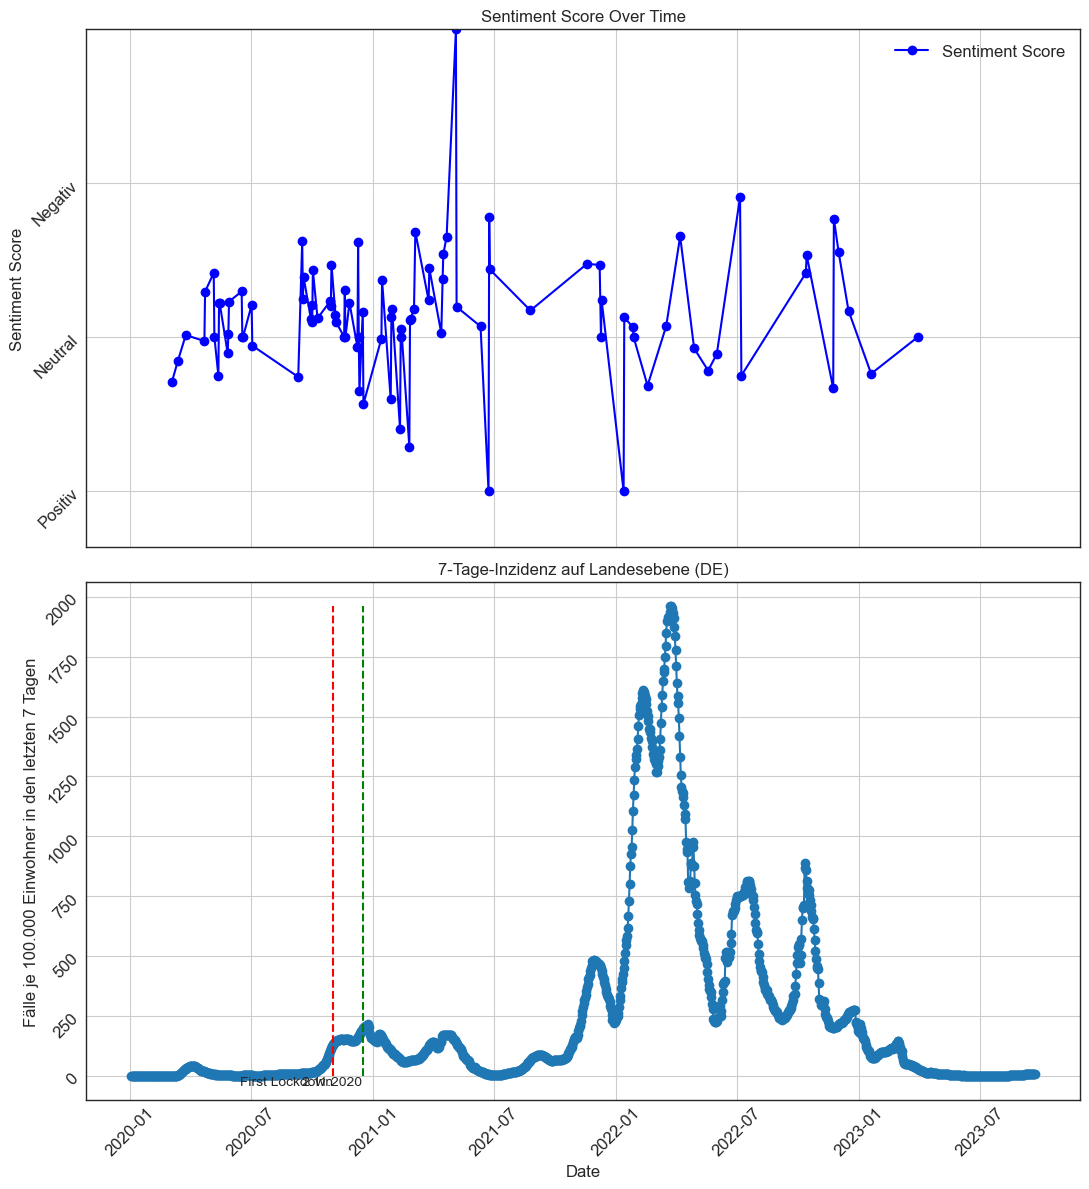

In [138]:
# Create a figure with two vertically stacked subplots
fig, axs = plt.subplots(2, 1, figsize=(11, 12), sharex=True)

# Plot 1: Sentiment Distribution Over Time (Positive vs. Negative) using 'result_df'
# Group the DataFrame by 'date' and calculate the average sentiment score for each day
sentiment_scores = result_df.groupby('date')['Sentiment_Score'].mean()

# Plot the sentiment scores
axs[0].plot(sentiment_scores.index, sentiment_scores, marker='o', linestyle='-', label='Sentiment Score', color='blue')

# Customize the first plot
axs[0].set_title('Sentiment Score Over Time')
axs[0].set_ylabel('Sentiment Score')
axs[0].grid(True)
axs[0].tick_params(rotation=45)
axs[0].legend()

# Plot 2: 7-Tage-Inzidenz using 'corona_fallzahlen_gesamt'
axs[1].plot(corona_fallzahlen_gesamt['date'], corona_fallzahlen_gesamt['Inzidenz_7-Tage'], marker='o', linestyle='-')

# Convert the lockdown dates to numerical format
lockdown_dates = [mdates.date2num(pd.to_datetime('2020-11-02')),
                  mdates.date2num(pd.to_datetime('2020-12-16'))]

# Add vertical lines for the lockdown dates
axs[1].vlines(lockdown_dates, ymin=0, ymax=max(corona_fallzahlen_gesamt['Inzidenz_7-Tage']),
           color=['red', 'green'], linestyle='--')

# Customize the second plot with labels underneath each other
axs[1].set_title('7-Tage-Inzidenz auf Landesebene (DE)')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Fälle je 100.000 Einwohner in den letzten 7 Tagen')
axs[1].grid(True)
axs[1].tick_params(rotation=45)

# Labels for lockdowns
lockdown_labels = ['First Lockdown', '2.11.2020', 'Second Lockdown', '16.12.2020']

# Add labels as text annotations underneath each other
for i in range(0, len(lockdown_dates)):
    axs[1].annotate(lockdown_labels[i], (lockdown_dates[i], 0), ha='right', va='top')

# Passe die y-Achse des ersten Diagramms anhand des Sentiment-Wertebereichs an
min_sentiment_score = result_df['Sentiment_Score'].min()
max_sentiment_score = result_df['Sentiment_Score'].max()
axs[0].set_ylim(min_sentiment_score, max_sentiment_score)

# Füge y-Achsenbeschriftungen für das Sentiment hinzu
axs[0].set_yticks([40, 50, 60])
axs[0].set_yticklabels(['Positiv', 'Neutral', 'Negativ'])

# Adjust subplot spacing
plt.tight_layout()

# Show the combined plot
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


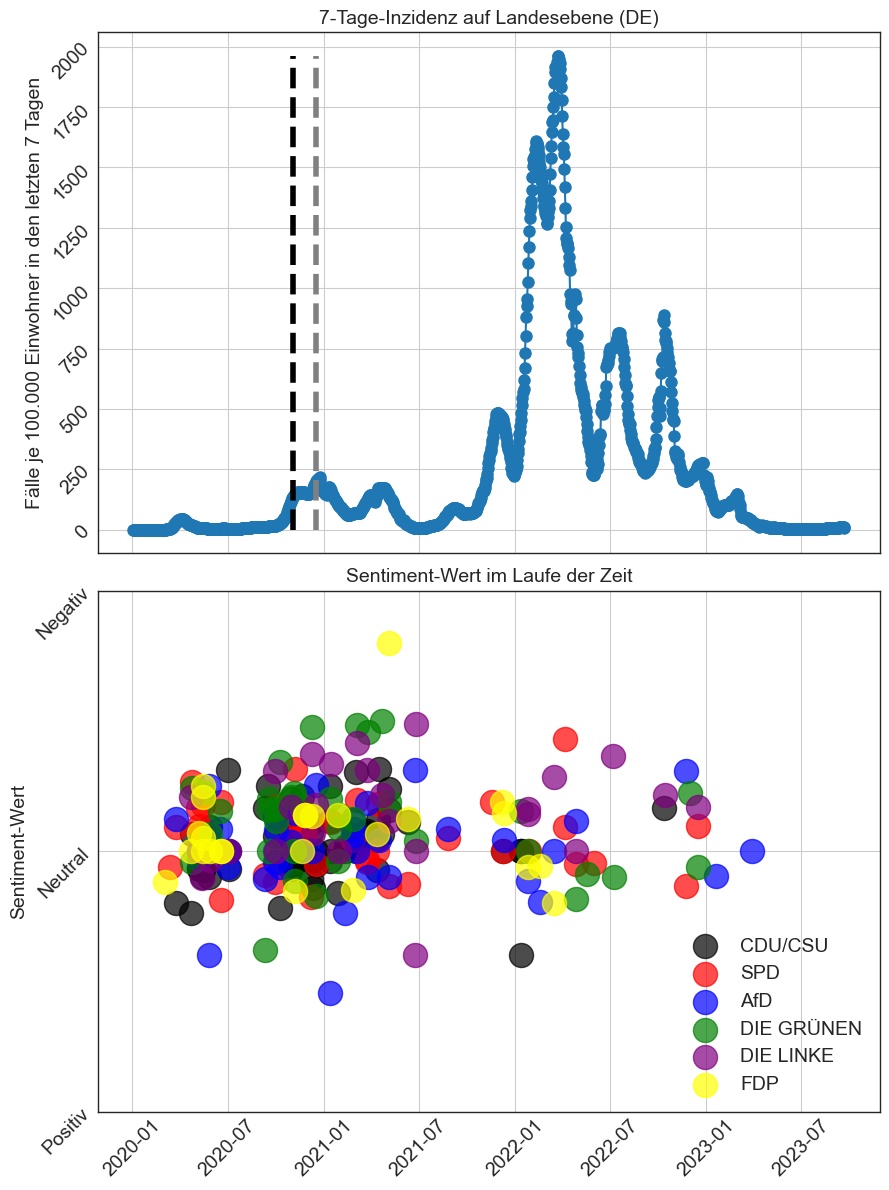

In [139]:
# Erstelle eine Abbildung mit zwei vertikal gestapelten Untergliederungen
fig, axs = plt.subplots(2, 1, figsize=(9, 12), sharex=True)

# Erhöhe die Größe der Bubbles und der grafischen Linien
marker_scaling_factor = 300  # Erhöhe diesen Wert bei Bedarf

# Setze eine größere Schriftgröße
font_size = 14  # Erhöhe diesen Wert bei Bedarf

# Diagramm 1: Sentiment-Verteilung im Laufe der Zeit (Positiv vs. Negativ) mit 'result_df'
# Gruppiere das DataFrame nach 'date' und berechne den durchschnittlichen Sentiment-Wert für jeden Tag
sentiment_scores = result_df.groupby('date')['Sentiment_Score'].mean()

# Konvertiere die gruppierten Sentiment-Werte in ein DataFrame
sentiment_scores_df = sentiment_scores.reset_index()

# Transformiere die Sentiment-Werte in den gewünschten Bereich
transformed_sentiment_scores = 100 - (sentiment_scores * 100)

# Definiere Farben für die Parteien
party_colors = {
    'CDU/CSU': 'black',
    'SPD': 'red',
    'AfD': 'blue',
    'DIE GRÜNEN': 'green',
    'DIE LINKE': 'purple',
    'FDP': 'yellow'
}

# Erstelle den Scatterplot für die Sentiment-Werte mit Parteifarben
for party, color in party_colors.items():
    party_data = result_df[result_df['party'] == party]
    axs[1].scatter(party_data['date'], party_data['Sentiment_Score'],
                   label=party, color=color, alpha=0.7, marker='o', s=marker_scaling_factor)

# Individualisiere das erste Diagramm
axs[1].set_title('Sentiment-Wert im Laufe der Zeit', fontsize=font_size)
axs[1].set_ylabel('Sentiment-Wert', fontsize=font_size)
axs[1].grid(True)
axs[1].tick_params(rotation=45, labelsize=font_size)
axs[1].legend(fontsize=font_size)

# Passe die y-Achse des ersten Diagramms anhand des Sentiment-Wertebereichs an
min_sentiment_score = result_df['Sentiment_Score'].min()
max_sentiment_score = result_df['Sentiment_Score'].max()
axs[1].set_ylim(min_sentiment_score, max_sentiment_score)

# Füge y-Achsenbeschriftungen für das Sentiment hinzu
axs[1].set_yticks([25, 50, 75])
axs[1].set_yticklabels(['Positiv', 'Neutral', 'Negativ'], fontsize=font_size)

# Diagramm 2: 7-Tage-Inzidenz mit 'corona_fallzahlen_gesamt'
axs[0].plot(corona_fallzahlen_gesamt['date'], corona_fallzahlen_gesamt['Inzidenz_7-Tage'], marker='o', linestyle='-', markersize=8)  # Erhöhe die Markierungsgröße

# Füge vertikale Linien für die Lockdown-Daten mit aktualisiertem Stil und Dicke hinzu
axs[0].vlines(lockdown_dates, ymin=0, ymax=max(corona_fallzahlen_gesamt['Inzidenz_7-Tage']),
           color=['black', 'grey'], linestyle=['--', '--'], linewidth=4)  # Passe den Linienstil und die Linienbreite an

# Individualisiere das zweite Diagramm
axs[0].set_title('7-Tage-Inzidenz auf Landesebene (DE)', fontsize=font_size)
axs[0].set_ylabel('Fälle je 100.000 Einwohner in den letzten 7 Tagen', fontsize=font_size)
axs[0].grid(True)
axs[0].tick_params(rotation=45, labelsize=font_size)
axs[0].legend(fontsize=font_size)

# Passe den Abstand zwischen den Untergliederungen an
plt.tight_layout()

# Zeige das kombinierte Diagramm
plt.savefig("plot.png", dpi=700, bbox_inches='tight')


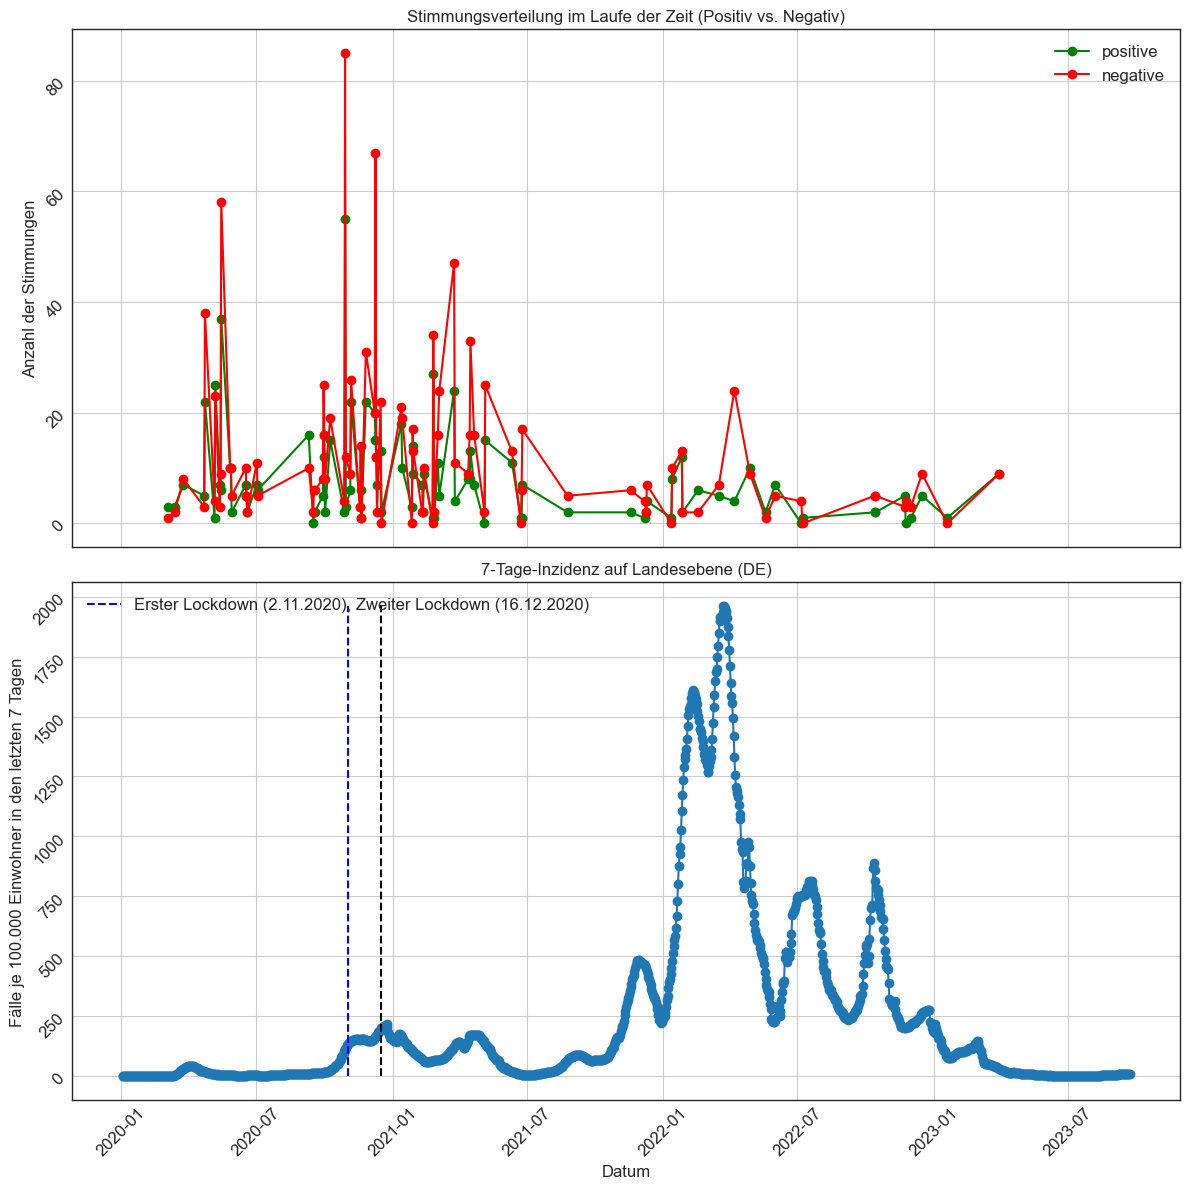

In [140]:
# Erstelle Abbildung mit zwei Diagrammen
fig, axs = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

# Diagramm 1: Sentiment im Laufe der Zeit (Positiv vs. Negativ)
# Gruppiere das DataFrame nach 'Date' und 'Sentiment', um die Häufigkeit zu zählen
sentiment_counts = merged_sentiment.groupby(['date', 'Sentiment_Label']).size().unstack(fill_value=0)
sentiment_counts_filtered = sentiment_counts[['positive', 'negative']]

# Definiere Farben für die Linien
colors = ['green', 'red']

# Zeichne jedes Sentiment für jeden Tag
for sentiment, color in zip(sentiment_counts_filtered.columns, colors):
    axs[0].plot(sentiment_counts_filtered.index, sentiment_counts_filtered[sentiment], marker='o', linestyle='-', label=sentiment, color=color)

# Layout 1. Diagramm
axs[0].set_title('Stimmungsverteilung im Laufe der Zeit (Positiv vs. Negativ)')
axs[0].set_ylabel('Anzahl der Stimmungen')
axs[0].grid(True)
axs[0].tick_params(rotation=45)
axs[0].legend()

# Diagramm 2: 7-Tage-Inzidenz
axs[1].plot(corona_fallzahlen_gesamt['date'], corona_fallzahlen_gesamt['Inzidenz_7-Tage'], marker='o', linestyle='-')

# Konvertiere die Lockdown-Daten in numerisches Format
lockdown_dates = [mdates.date2num(pd.to_datetime('2020-11-02')),
                  mdates.date2num(pd.to_datetime('2020-12-16'))]

# Füge Linien, zur Kennzeichnung der Lockdown-Daten im Digramm hinzu
axs[1].vlines(lockdown_dates, ymin=0, ymax=max(corona_fallzahlen_gesamt['Inzidenz_7-Tage']),
           color=['blue', 'black'], linestyle='--', label='Erster Lockdown (2.11.2020), Zweiter Lockdown (16.12.2020)')

# Layout 1. Diagramm
axs[1].set_title('7-Tage-Inzidenz auf Landesebene (DE)')
axs[1].set_xlabel('Datum')
axs[1].set_ylabel('Fälle je 100.000 Einwohner in den letzten 7 Tagen')
axs[1].grid(True)
axs[1].tick_params(rotation=45)
axs[1].legend()

# Anpassung des Abstands zwischen den Untergliederungen
plt.tight_layout()

# Zeige das kombinierte Diagramm
plt.show()


### 3.2 Korrelationsanalyse

Im nächsten Schritt werden wir mittels einer Korrelationsanalyse untersuchen, ob es einen linearen Zusammenhang zwischen dem Anstieg in der 7 Tages-Inzidenz und dem Verlauf des Sentiments gibt.  

Wir nutzen dafür die Variablen "7-Tages-Inzidenz" und "Fälle neu" aus unserem Corona Gesamtzahlen DataFrame und vergleichen die Werte mit unserem Datafram SentimentScore, welches die durchschnittlichen Sentimentwerte für 92 Tage wiederspiegelt. 

In [88]:
# Mergen des df auf basis der Datumsvariable
merged_data = pd.merge(corona_fallzahlen_gesamt, result_df, on='date', how='inner')

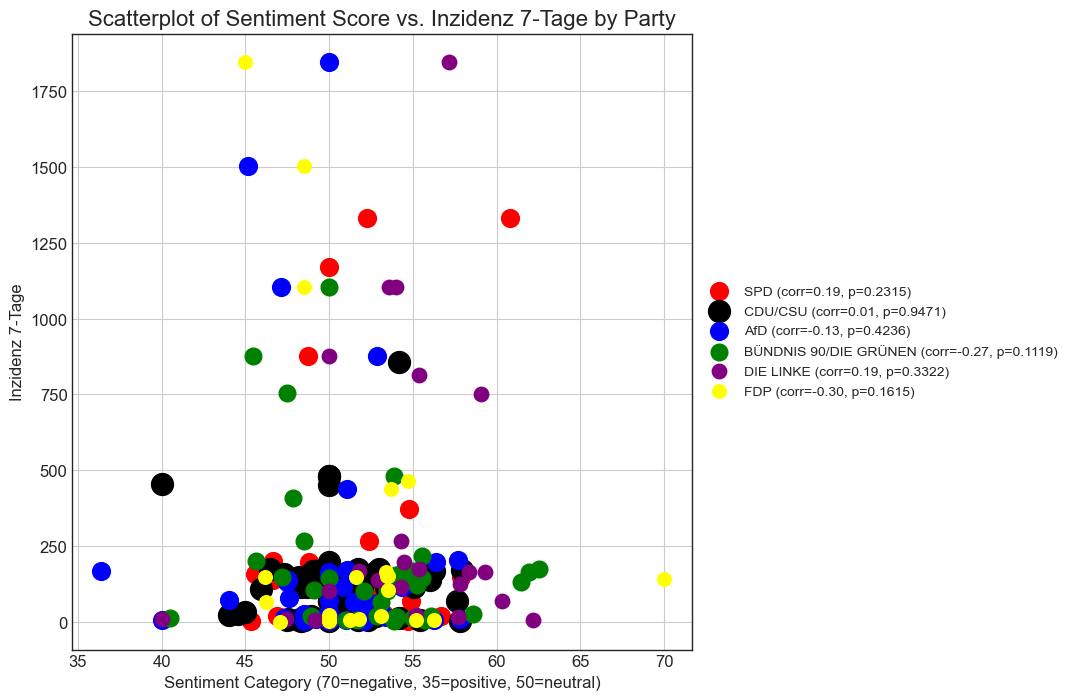

In [141]:
from scipy.stats import pearsonr  # Import  Pearson correlation 

# Festlegung der 6 Parteien
parties = ['SPD', 'CDU/CSU', 'AfD', 'BÜNDNIS 90/DIE GRÜNEN', 'DIE LINKE', 'FDP']

# Farben für Parteien festlegen
party_colors = {
    'CDU/CSU': 'black',
    'SPD': 'red',
    'AfD': 'blue',
    'BÜNDNIS 90/DIE GRÜNEN': 'green',
    'DIE LINKE': 'purple',
    'FDP': 'yellow'
}


plt.figure(figsize=(8, 8))

for party in parties:
    party_data = merged_data[merged_data['party'] == party]

    # Voraussetzung zur Berrechnung der Korrelation prüfen (p-Value und Pearson Korrelation)
    if len(party_data) >= 2:
        # Calculate the correlation coefficient and p-value
        correlation_coefficient, p_value = pearsonr(party_data['Inzidenz_7-Tage'], party_data['Sentiment_Score'])

        # Größe der Bubble in Abhängigkeit der Anzahl an Datenpunkten
        marker_size = party_data.shape[0] * 4  # Maß anpassen

        # Unter Verwendung der Partei Farben wird Graph erstellt
        plt.scatter(
            party_data['Sentiment_Score'],
            party_data['Inzidenz_7-Tage'],
            label=f'{party} (corr={correlation_coefficient:.2f}, p={p_value:.4f})',
            s=marker_size,
            color=party_colors.get(party, 'gray'),
        )

# ANpassung des Plots
plt.title('Scatterplot of Sentiment Score vs. Inzidenz 7-Tage by Party', fontsize=16)
plt.xlabel('Sentiment Category (70=negative, 35=positive, 50=neutral)', fontsize=12)
plt.ylabel('Inzidenz 7-Tage', fontsize=12)

# Legende rechts platzieren
plt.legend(fontsize=10, loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, facecolor='white', edgecolor='black')
plt.grid(True)

# Show the plot
plt.show()


In einem nächsten Schritt wollen wir unabhängig von den Sentiment der einzelnen Parteien die Korrelation des durchschnittlichen Sentiment Scores mit der 7-Tages-Inzidenz vergleichen, dadurch erhalten wir allerdings weniger Datenpunkte.

In [153]:
# Wir wollen nur die Corona Daten haben, für die Daten für die wir auch den Sentiment-Score bestimmt haben, wir benötigen also n=243 Datenpunkte
corr_df = result_df.merge(corona_fallzahlen_gesamt, on='date', how='inner')

In [154]:
# Berechnung der Korrelation und zugehörigen p-Werte
correlation_results = pg.pairwise_corr(corr_df, columns=['Sentiment-Score', 'Inzidenz_7-Tage'], method='pearson')

# In tabelle ausgeben
correlation_results = correlation_results[['X', 'Y', 'r', 'p-unc']].rename(
    columns={'X': 'Variable 1', 'Y': 'Variable 2', 'r': 'Correlation', 'p-unc': 'P-Value'}
)

# Formatkonvertierung
table = tabulate(correlation_results, headers='keys', tablefmt='pretty', showindex=False)
print(table)


+-----------------+-----------------+-----------------------+------------------------+
|   Variable 1    |   Variable 2    |      Correlation      |        P-Value         |
+-----------------+-----------------+-----------------------+------------------------+
| Inzidenz_7-Tage |     period      |  -0.7693227964620456  |  8.43265836248269e-49  |
| Inzidenz_7-Tage | Sentiment_Score | -0.019393471956247306 |   0.7635793676049548   |
| Inzidenz_7-Tage |  Faelle_gesamt  |  0.5336442798280048   | 2.748556214170853e-19  |
| Inzidenz_7-Tage |   Faelle_neu    |  0.9926476046020823   | 5.008547051205016e-223 |
| Inzidenz_7-Tage |  Faelle_7-Tage  |   0.99999999627154    |          0.0           |
+-----------------+-----------------+-----------------------+------------------------+


In [159]:
import pingouin as pg

# Calculate correlation coefficients and p-values
correlation_results = pg.pairwise_corr(corr_df, columns=['Sentiment-Score', 'Inzidenz_7-Tage'], method='pearson')

# Convert the correlation results to a DataFrame
correlation_df = correlation_results[['X', 'Y', 'r', 'p-unc']].rename(
    columns={'X': 'Variable 1', 'Y': 'Variable 2', 'r': 'Correlation', 'p-unc': 'P-Value'}
)

# Save the DataFrame as a CSV file
correlation_df.to_csv('correlation_results.csv', index=False)

# Print a confirmation message
print('Correlation results saved to correlation_results.csv')


Correlation results saved to correlation_results.csv


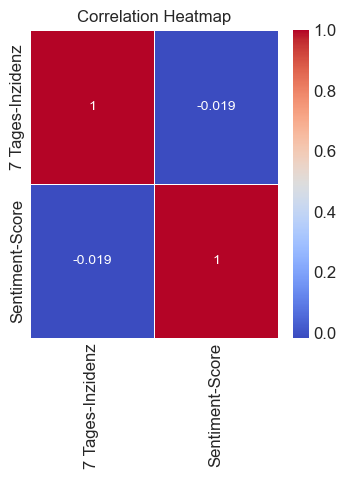

In [158]:
# Ausgabe in einer Korrelations Heatmap zur besseren Visualisierung

import seaborn as sns

data_corr = pd.DataFrame({
    '7 Tages-Inzidenz': corr_df["Inzidenz_7-Tage"] ,
    
    'Sentiment-Score': corr_df["Sentiment_Score"]
  
})

# Berechnung der Korrelation nur zwischen der 7-Tages-Inzidenz und dem Sentiment Score 
corr_matrix = data_corr.corr()

# Create a heatmap
plt.figure(figsize=(4 ,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


        Variable 1       Variable 2  Correlation   P-Value
0  Inzidenz_7-Tage       Unnamed: 0    -0.361829  0.000000
1  Inzidenz_7-Tage           period    -0.760084  0.000000
2  Inzidenz_7-Tage        redner_id     0.004824  0.616046
3  Inzidenz_7-Tage  Sentiment_Score     0.005202  0.588668
4  Inzidenz_7-Tage    Faelle_gesamt     0.542328  0.000000
5  Inzidenz_7-Tage       Faelle_neu     0.992216  0.000000
6  Inzidenz_7-Tage    Faelle_7-Tage     1.000000  0.000000


In [167]:
import pandas as pd
import pingouin as pg

# Sample data (replace this with your own dataset)
data_corr = pd.DataFrame({
    '7 Tages-Inzidenz': corr_df["Inzidenz_7-Tage"],
    'Sentiment-Score': corr_df["Sentiment_Score"]
})

# Calculate correlation coefficients and p-values
correlation_results = pg.pairwise_corr(data_corr, method='pearson')

# Display the correlation results in a table
correlation_results = correlation_results[['X', 'Y', 'r', 'p-unc']].rename(
    columns={'X': 'Variable 1', 'Y': 'Variable 2', 'r': 'Correlation', 'p-unc': 'P-Value'}
)
print(correlation_results)



         Variable 1       Variable 2  Correlation   P-Value
0  7 Tages-Inzidenz  Sentiment-Score     0.017391  0.869309


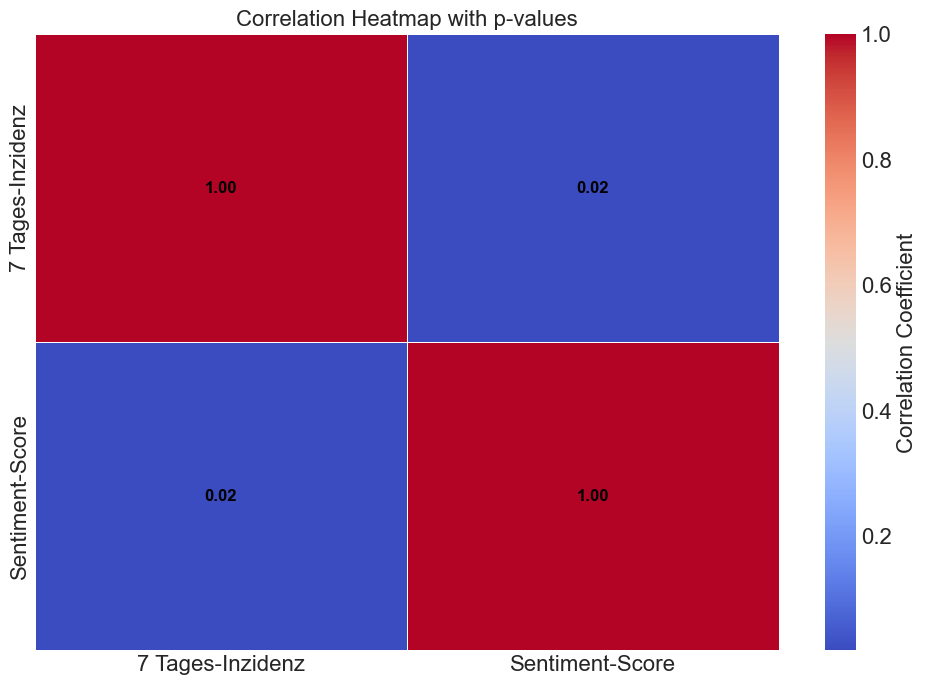

In [131]:
import seaborn as sns
from scipy.stats import pearsonr

# Sample data (replace this with your own dataset)
data_corr = pd.DataFrame({
    '7 Tages-Inzidenz': corr_df["Inzidenz_7-Tage"],
    'Sentiment-Score': corr_df["Sentiment_Score"]
})

# Compute the correlation matrix
corr_matrix = data_corr.corr()

# Calculate p-values for the correlation coefficients
p_values = pd.DataFrame()

for col1 in data_corr.columns:
    for col2 in data_corr.columns:
        if col1 != col2:
            corr, p_value = pearsonr(data_corr[col1], data_corr[col2])
            p_values.at[col1, col2] = p_value

# Create a heatmap with correlation coefficients and p-values
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f",
            annot_kws={'size': 12, 'weight': 'bold', 'color': 'black'},
            cbar_kws={'label': 'Correlation Coefficient'})

# Annotate the heatmap with p-values
for i in range(len(p_values)):
    for j in range(len(p_values.columns)):
        if i != j:
            p_val = p_values.iloc[i, j]
            if p_val < 0.001:  # You can set a significance threshold as needed
                plt.text(j + 0.5, i + 0.5, f'p={p_val:.4f}*', ha='center', va='center',
                         color='black', fontsize=12, weight='bold')

plt.title('Correlation Heatmap with p-values')
plt.show()


### 3.3 Topic Analyse

In [168]:
from transformers import pipeline

# Load the text classification pipeline
pipeline_classification_topics = pipeline("text-classification", model="chkla/parlbert-topic-german", return_all_scores=False)

# Assuming you have a DataFrame 'result_df' with a 'text' column
# Extract the text data from the DataFrame
texts_to_classify = result_df['text']

# Initialize an empty list to store the classification results
classification_results = []

# Set a maximum token length for the model
max_token_length = 512  # Adjust this value based on your model's maximum token limit

# Iterate through the text entries and classify them
for text in texts_to_classify:
    # Split the long text into segments that fit within the model's token limit
    segments = [text[i:i+max_token_length] for i in range(0, len(text), max_token_length)]
    
    # Classify each segment separately
    segment_results = [pipeline_classification_topics(segment) for segment in segments]
    
    # Combine the results from all segments (you can customize how you combine them)
    combined_result = {
        'topic': [result[0]['label'] for result in segment_results],
        'probability': [result[0]['score'] for result in segment_results],
    }
    
    # Append the combined result to the list
    classification_results.append(combined_result)

# Create a new DataFrame to store the classification results
topic_df = pd.DataFrame(classification_results)

# Assuming your classification_df has columns like 'label' and 'score' for the classification results
print(topic_df)

# Merge classification_df with result_df using the index and keeping all columns of result_df
topic_df = result_df.merge(topic_df, left_index=True, right_index=True)



Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.
/Users/paulahofmann/anaconda3/envs/env1/lib/python3.11/site-packages/transformers/pipelines/text_cl

                                                 topic  \
0    [Technology, Health, Health, Health, Health, H...   
1    [Health, Government, Labor, Labor, Government,...   
2    [Government, Domestic, Health, Domestic, Macro...   
3    [Health, Government, Government, Law, Law, Dom...   
4    [Government, Health, Domestic, Law, Government...   
..                                                 ...   
238  [Civil, Health, Health, Health, Health, Health...   
239  [Civil, Civil, Health, Health, Health, Health,...   
240  [Health, Health, Health, Health, Health, Healt...   
241   [Health, Health, Health, Health, Health, Health]   
242  [Social, Social, Government, Domestic, Domesti...   

                                           probability  
0    [0.8730884194374084, 0.9958589673042297, 0.997...  
1    [0.9990963935852051, 0.9961317777633667, 0.977...  
2    [0.9381905794143677, 0.9774143695831299, 0.998...  
3    [0.5196781754493713, 0.8637508153915405, 0.987...  
4    [0.5442996025

In [169]:
# Assuming 'topic_df' is your DataFrame with 'ID' and 'topic' columns where 'topic' is a list of topics
# Create a new DataFrame with all original columns and a simplified 'topic' column
unique_topic_df = pd.DataFrame()

# Copy all columns except 'topic'
unique_topic_df = topic_df.drop(columns=['topic'])

# Add the simplified 'topic' column
unique_topic_df['topic'] = topic_df['topic'].apply(lambda x: list(set(x)))

# Übersetze alle Topics ins Deutsche
# Define a translation dictionary for the topics
topic_translation = {
    'Labor': 'Arbeit',
    'Government': 'Regierung',
    'Health': 'Gesundheit',
    'International': 'Außenpolitik',
        'Technology': 'Technologie',
        'Domestic': 'Innenpolitik',
        'Agriculture':'Landwirtschaft',
        'Macroeconomics':'Volkswirtschaft',
        'Law':'Gesetzgebung',
        'Housing':'Haushalt',
        'Social':'Soziales',
        'Education':'Bildung',
        'Civil':'Bürgerrechte',
        'Foreign':'Ausländisches',
        'Defense':'Verteidigung',
        'Energy':'Energie',
        'Public':'Öffentliches',
        'Environment': 'Umwelt',
        'Immigration':'Einwanderung',
        'Transportation':'Verkehrswesen',
        'Culture':'Kultur'

}

# Translate the 'topic' column using the translation dictionary
unique_topic_df['topic'] = unique_topic_df['topic'].apply(lambda topics: [topic_translation[topic] for topic in topics])

# Now, the 'topic' column contains translated topics in German


# Löschen der Probability Variable, da diese keine Bedeutung mehr hat 
unique_topic_df.drop (["probability"], axis=1)


id       date       party                 name  \
0    ID1914800900 2020-03-04         FDP       Andrew Ullmann   
1    ID1915300100 2020-03-13         SPD          Olaf Scholz   
2    ID1915400200 2020-03-25         AfD    Alexander Gauland   
3    ID1915401300 2020-03-25     CDU/CSU        Thorsten Frei   
4    ID1915402500 2020-03-25         SPD  Christine Lambrecht   
..            ...        ...         ...                  ...   
238   ID207703900 2022-12-16  DIE GRÜNEN           Armin Grau   
239   ID207704300 2022-12-16         SPD     Herbert Wollmann   
240   ID207707100 2022-12-16   DIE LINKE       Kathrin Vogler   
241   ID207910600 2023-01-19         AfD       Christina Baum   
242   ID209400400 2023-03-30         AfD           Jörn König   

                                                  text  period  \
0    Sehr geehrter Herr Präsident! Liebe Kolleginne...      19   
1    Sehr geehrter Herr Präsident! Meine Damen und ...      19   
2    Herr Präsident! Meine Damen und Herren! Zuerst...      19   
3    Herr Präsident! Liebe Kolleginnen und Kollegen...      19   
4    Herr Präsident! Meine sehr geehrten Damen und ...      19   
..                                                 ...     ...   
238  Sehr geehrte Frau Präsidentin! Liebe Kolleginn...      18   
239  Sehr geehrte Frau Präsidentin! Sehr geehrte Da...      18   
240  Sehr geehrte Frau Präsidentin! Kolleginnen und...      18   
241  Frau Präsidentin! Meine Damen und Herren! Von ...      18   
242  Sehr geehrte Frau Präsidentin! Sehr geehrte Fr...      18   

     Sentiment_Score                                              topic  
0          47.058824                          [Technologie, Gesundheit]  
1          48.437500      [Arbeit, Gesundheit, Regierung, Außenpolitik]  
2          53.125000  [Gesundheit, Regierung, Innenpolitik, Außenpol...  
3          45.000000  [Gesetzgebung, Haushalt, Gesundheit, Regierung...  
4          52.272727  [Gesetzgebung, Haushalt, Gesundheit, Regierung...  
..               ...                                                ...  
238        48.484848                         [Bürgerrechte, Gesundheit]  
239        52.380952                         [Bürgerrechte, Gesundheit]  
240        54.285714                            [Gesundheit, Regierung]  
241        47.619048                                       [Gesundheit]  
242        50.000000    [Gesundheit, Innenpolitik, Regierung, Soziales]  

[243 rows x 8 columns]

In [179]:
# Initialisiere ein leeres Dictionary, um die Anzahl der Themen zu speichern
topic_counts = {}

# Iteriere durch die Zeilen des DataFrames
for _, zeile in unique_topic_df.iterrows():
    themen = zeile['topic']  # Hole die Liste der Themen für die aktuelle Zeile

    # Iteriere durch die Themen in der Liste
    for topic in themen:
        if topic in topic_counts:
            topic_counts[topic] += 1
        else:
            topic_counts[topic] = 1


# Annahme: topic_counts ist das vorhandene Dictionary
# Erstelle einen DataFrame aus dem Dictionary mit den Spalten "Topic" und "Count"
topic_counts_df = pd.DataFrame(list(topic_counts.items()), columns=['Topic', 'Count'])

print(topic_counts_df)



              Topic  Count
0       Technologie     32
1        Gesundheit    187
2            Arbeit     34
3         Regierung    173
4      Außenpolitik     86
5      Innenpolitik     64
6   Volkswirtschaft     39
7      Gesetzgebung     23
8          Haushalt      7
9          Soziales     65
10          Bildung     13
11     Bürgerrechte     69
12    Ausländisches      4
13     Verteidigung     18
14          Energie      7
15   Landwirtschaft     19
16     Öffentliches      2
17           Umwelt     10
18     Einwanderung      7
19    Verkehrswesen      6
20           Kultur      1


In [171]:
import pandas as pd
from itertools import combinations

def count_topic_cooccurrence(df):
    """
    Count how often topics co-occur together in lists within a DataFrame.

    Args:
        df (pd.DataFrame): DataFrame containing a 'topic' column with lists of topics.

    Returns:
        pd.DataFrame: A DataFrame with topics as rows and columns, showing the co-occurrence counts.
    """
    # Create an empty dictionary to store co-occurrence counts
    cooccurrence_counts = {}

    # Iterate through the rows of the DataFrame
    for _, row in df.iterrows():
        topics = row['topic']  # Get the list of topics for the current row

        # Generate all combinations of 2 topics from the list
        topic_combinations = list(combinations(topics, 2))

        # Update co-occurrence counts for each combination
        for combination in topic_combinations:
            if combination in cooccurrence_counts:
                cooccurrence_counts[combination] += 1
            else:
                cooccurrence_counts[combination] = 1

    # Create a DataFrame from the co-occurrence counts dictionary
    cooccurrence_df = pd.DataFrame(list(cooccurrence_counts.items()), columns=['Topic Combination', 'Count'])
    
    return cooccurrence_df

# Example usage:
# Replace 'your_df' with your actual DataFrame containing a 'topic' column with lists of topics
# The result will be a DataFrame showing co-occurrence counts of topics.
cooccurrence_counts_df = count_topic_cooccurrence(unique_topic_df)
print(cooccurrence_counts_df)


                Topic Combination  Count
0       (Technologie, Gesundheit)     28
1            (Arbeit, Gesundheit)      8
2             (Arbeit, Regierung)      9
3          (Arbeit, Außenpolitik)      6
4         (Gesundheit, Regierung)    131
..                            ...    ...
205            (Haushalt, Umwelt)      1
206           (Energie, Soziales)      1
207            (Umwelt, Soziales)      1
208    (Ausländisches, Regierung)      1
209  (Innenpolitik, Einwanderung)      1

[210 rows x 2 columns]


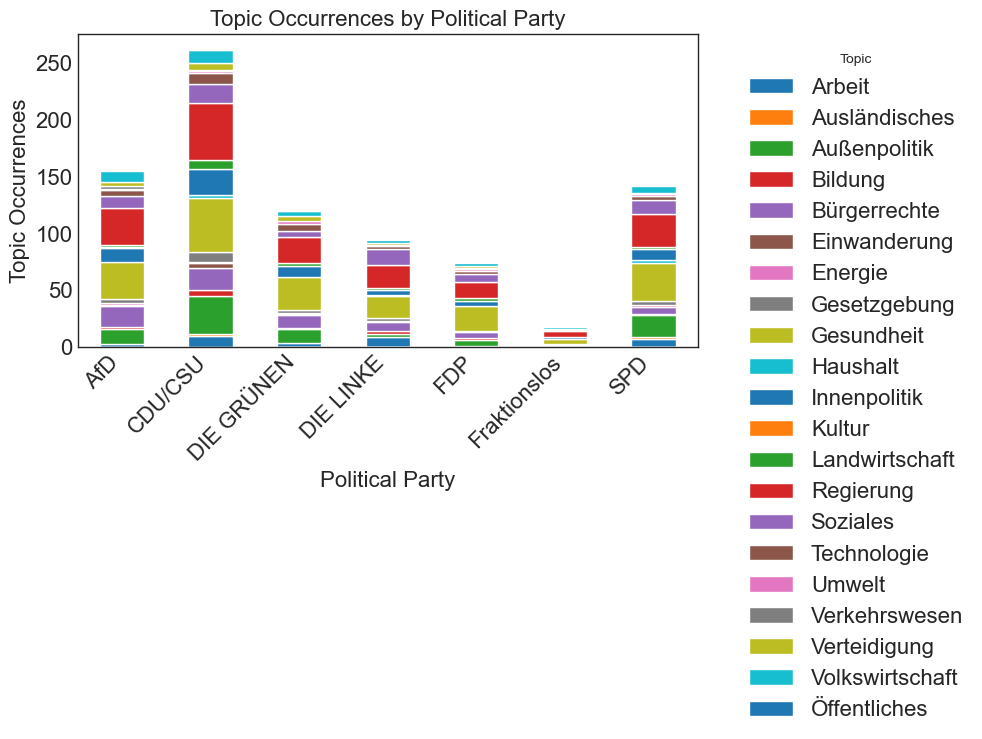

In [172]:

def visualize_topic_occurrences_by_party(unique_topic_df):
    """
    Visualize the occurrence of topics by political party.

    Args:
        topic_df (pd.DataFrame): DataFrame containing data with columns 'party' and 'label'.

    Returns:
        None
    """
    # Flatten the 'label' column, which contains lists of topics
    unique_topic_df = unique_topic_df.explode('topic')
    
    # Group by party and topic, then count occurrences
    topic_counts = unique_topic_df.groupby(['party', 'topic']).size().unstack(fill_value=0)
    
    # Plot the data as a bar chart
    topic_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
    
    # Customize the plot
    plt.title('Topic Occurrences by Political Party')
    plt.xlabel('Political Party')
    plt.ylabel('Topic Occurrences')
    plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45, ha='right')
    
    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage:
visualize_topic_occurrences_by_party(unique_topic_df)


/Users/paulahofmann/anaconda3/envs/env1/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



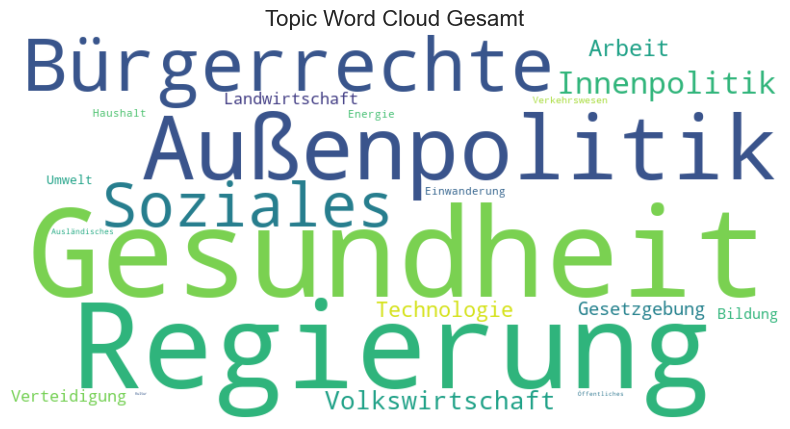

In [181]:
# Create a dictionary from topic_counts_df for word cloud
topic_dict = dict(zip(topic_counts_df['Topic'], topic_counts_df['Count']))

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_dict)

# Plot the WordCloud image                       
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Topic Word Cloud Gesamt")
plt.show()


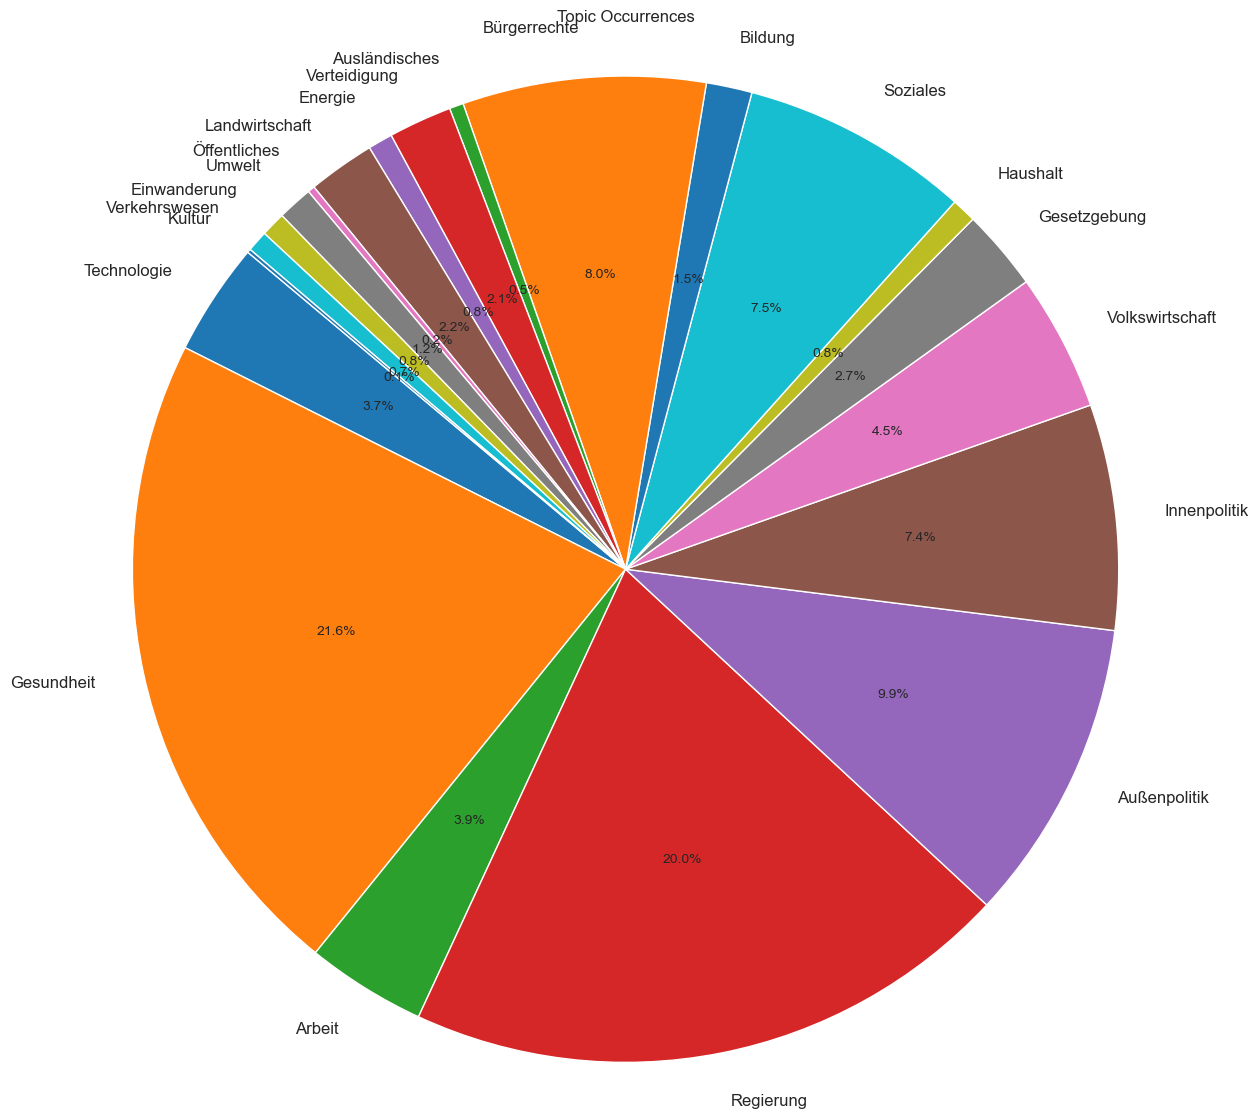

In [188]:


# Extract topics and their corresponding counts from topic_counts_df
topics = topic_counts_df['Topic']
counts = topic_counts_df['Count']

# Create a pie chart
plt.figure(figsize=(14, 14))
plt.pie(counts, labels=topics, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Set chart title
plt.title('Topic Occurrences')

# Display the pie chart
plt.show()



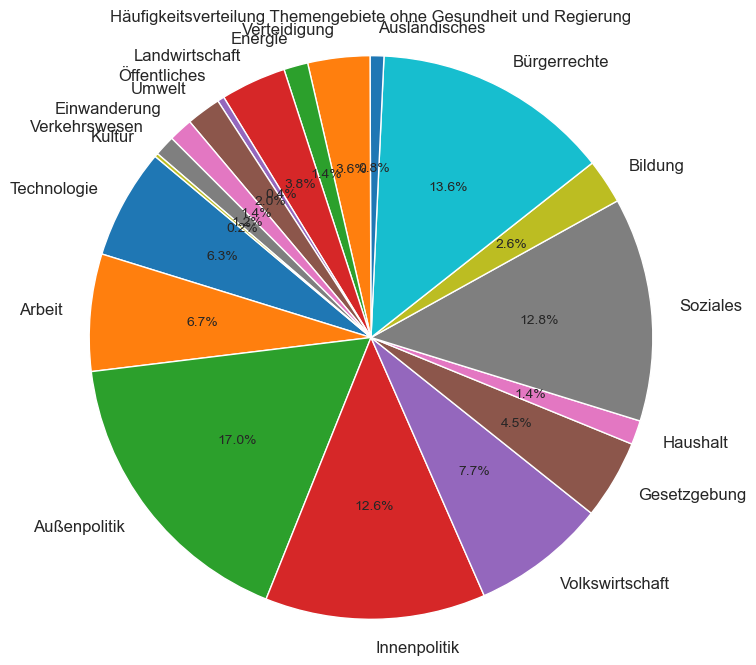

In [189]:
import matplotlib.pyplot as plt

def visualize_topic_occurrences_pie_chart(topic_counts_df, excluded_labels=[]):
    """
    Visualize topic occurrences in a pie chart, excluding specified labels.

    Args:
        topic_counts_df (pd.DataFrame): DataFrame with topics and their counts.
        excluded_labels (list): List of labels to exclude from the pie chart.

    Returns:
        None
    """
    # Filter out excluded labels from the DataFrame
    filtered_df = topic_counts_df[~topic_counts_df['Topic'].isin(excluded_labels)]
    
    # Extract topics and their corresponding counts
    topics = filtered_df['Topic']
    counts = filtered_df['Count']
    
    # Create a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(counts, labels=topics, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Set chart title
    plt.title('Häufigkeitsverteilung Themengebiete ohne Gesundheit und Regierung')

    # Display the pie chart
    plt.show()

# Example usage:
excluded_labels = ['Gesundheit', 'Regierung']  # Specify labels to exclude
visualize_topic_occurrences_pie_chart(topic_counts_df, excluded_labels)


In [190]:
# Finde die Zeile mit dem maximalen Wert in der Spalte '7-Tages_Inzidenz'
max_row = corona_fallzahlen_gesamt.loc[corona_fallzahlen_gesamt['Inzidenz_7-Tage'].idxmax()]

# Extrahiere den maximalen Wert und das entsprechende Datum
max_value = max_row['Inzidenz_7-Tage']
corresponding_date = max_row['date']

# Gib das Ergebnis aus
print(f"Der maximale Wert der 7-Tages-Inzidenz beträgt {max_value} am {corresponding_date}")



Der maximale Wert der 7-Tages-Inzidenz beträgt 1961.6 am 2022-03-24 00:00:00


In [209]:
def visualize_unique_topics_in_date_range_wordcloud(df, start_date, end_date):
    """
    Visualizes the distribution of unique topics in a DataFrame within a specified date range using word clouds.

    Parameters:
        df (pd.DataFrame): The input DataFrame containing the topics and dates.
        start_date (str): Start date in the format 'YYYY-MM-DD'.
        end_date (str): End date in the format 'YYYY-MM-DD'.

    Returns:
        None (displays word clouds).
    """
    # Filter the DataFrame to include only rows within the specified date range
    filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

    # Extract and flatten the list of topics within the date range
    topics_within_range = [topic for topics_list in filtered_df['topic'] for topic in topics_list]

    # Create a text string from the topics
    topics_text = ' '.join(topics_within_range)

    # Generate the Word Cloud
    wordcloud = WordCloud(width=800, height=200,
                          background_color='white',
                          min_font_size=10).generate(topics_text)

    # Create the title with the date range
    title = f"Schwerpunkte im Zeitraum {start_date} bis {end_date}"

    # Plot the Word Cloud
    plt.figure(figsize=(8, 3), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)

    # Display the Word Cloud with the title
    plt.title(title)
    plt.show()



/Users/paulahofmann/anaconda3/envs/env1/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



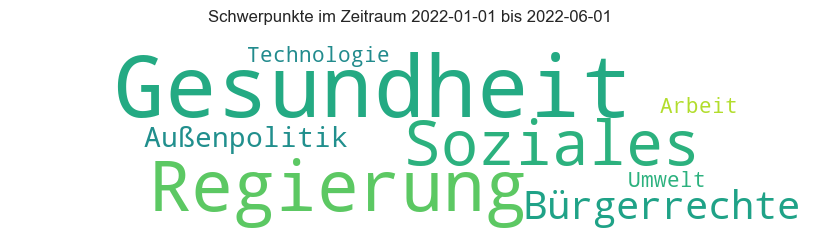

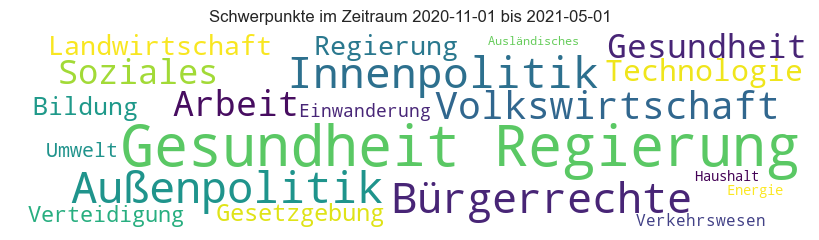

In [210]:
# Example usage:
# Hier nehmen wir an, dass Ihr DataFrame 'unique_topic_df' die Spalten 'Date' und 'Topic' hat, und 'Topic' enthält Listen.
# Wir wählen hier beispielhaft den Zeitraum von '2022-01-01' bis '2022-05-01'.
visualize_unique_topics_in_date_range_wordcloud(unique_topic_df, '2022-01-01', '2022-06-01') 


# Zeitraum Corona Lockdown 
visualize_unique_topics_in_date_range_wordcloud(unique_topic_df, '2020-11-01', '2021-05-01') 

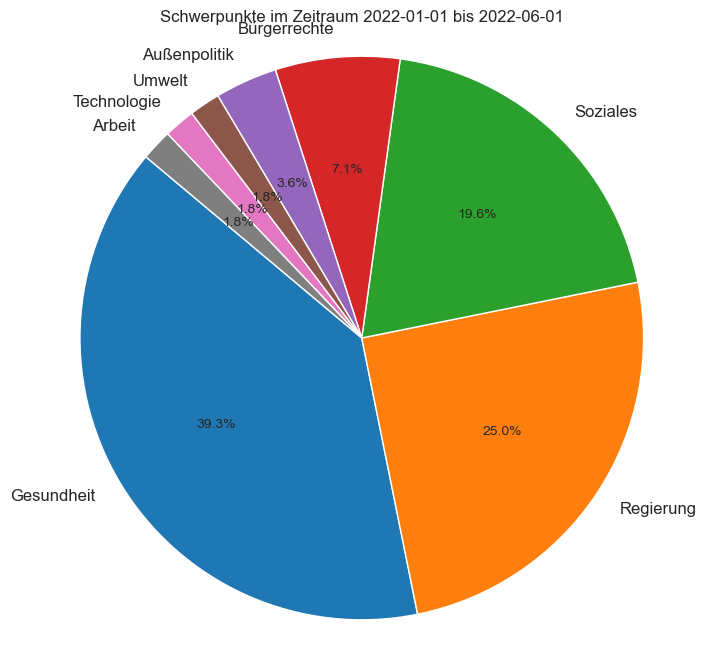

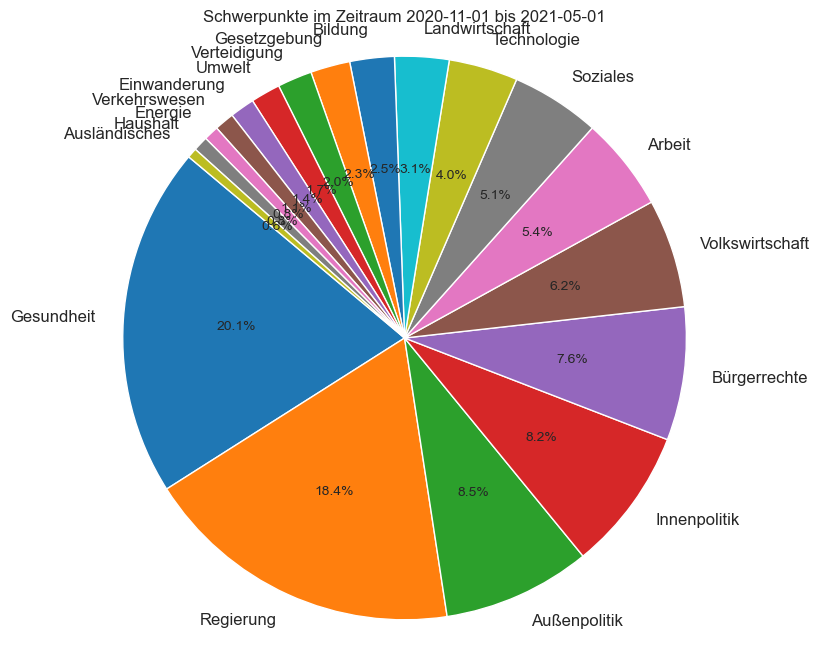

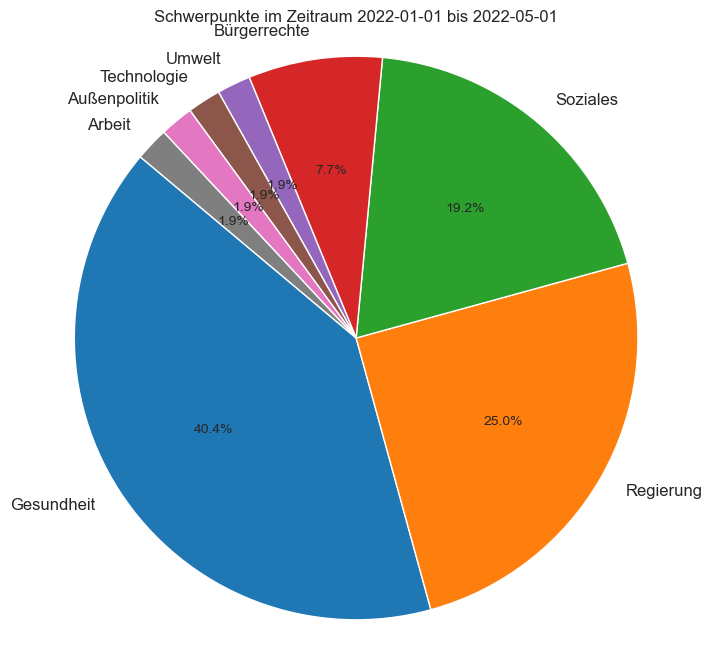

In [198]:
def visualize_unique_topics_in_date_range_BarPlot(df, start_date, end_date):
    """
    Visualizes the distribution of unique topics in a DataFrame within a specified date range using a bar plot.

    Parameters:
        df (pd.DataFrame): The input DataFrame containing the topics and dates.
        start_date (str): Start date in the format 'YYYY-MM-DD'.
        end_date (str): End date in the format 'YYYY-MM-DD'.

    Returns:
        None (displays a bar plot).
    """
    # Filter the DataFrame to include only rows within the specified date range
    filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

    # Extract and flatten the list of topics within the date range
    topics_within_range = [topic for topics_list in filtered_df['topic'] for topic in topics_list]

    # Count the unique topics and their occurrences
    unique_topics, topic_counts = pd.Series(topics_within_range).value_counts().index, pd.Series(topics_within_range).value_counts().values

    # Create the title with the date range
    title = f"Verteilung der Einzigartigen Themen ({start_date} bis {end_date})"

    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(unique_topics, topic_counts)
    plt.xlabel('Thema')
    plt.ylabel('Anzahl')
    plt.title(title)
    plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

    # Display the bar chart
    plt.tight_layout()
    plt.show()

# Example usage:
# Hier nehmen wir an, dass Ihr DataFrame 'unique_topic_df' die Spalten 'Date' und 'Topic' hat, und 'Topic' enthält Listen.
# Wir wählen hier beispielhaft den Zeitraum von '2022-01-01' bis '2022-05-01'.
visualize_unique_topics_in_date_range(unique_topic_df, '2022-01-01', '2022-05-01')


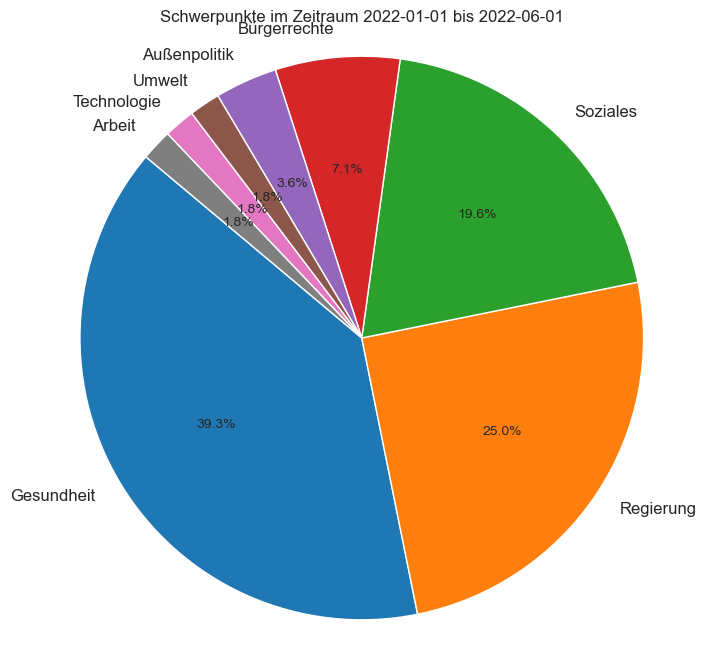

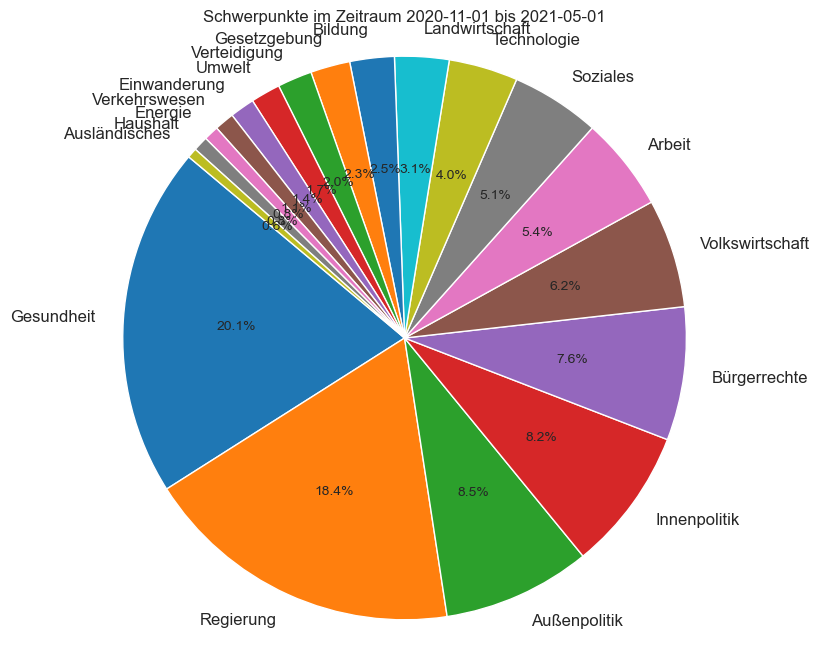

In [211]:
# Example usage:
# Hier nehmen wir an, dass Ihr DataFrame 'unique_topic_df' die Spalten 'Date' und 'Topic' hat, und 'Topic' enthält Listen.
# Wir wählen hier beispielhaft den Zeitraum von '2022-01-01' bis '2022-05-01'.
visualize_unique_topics_in_date_range(unique_topic_df, '2022-01-01', '2022-06-01') 


# Zeitraum Corona Lockdown 
visualize_unique_topics_in_date_range(unique_topic_df, '2020-11-01', '2021-05-01') 
